<a href="https://colab.research.google.com/github/akeyo03/Notebook/blob/main/natalie_akeyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CEMA 2025 Internship Program Task

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
df = pd.read_csv('HIV data 2000-2023.csv', encoding='latin1')
df.head()

IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode Location Period type  Period  \
0                 AGO   Angola        Year    2023   
1                 AGO   Angola        Year    2022   
2                 AGO   Angola        Year    2021   
3                 AGO   Angola        Year    2020   
4                 AGO   Angola        Year    2015   

                         Value  
0  320 000 [280 000 - 380 000]  
1  320 000 [280 000 - 380 000]  
2  320 000 [280 000 - 380 000]  
3  320 000 [280 000 - 370 000]  
4  300 000 [260 000 - 350 000]

In [ ]:
#getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IndicatorCode        1552 non-null   object
 1   Indicator            1552 non-null   object
 2   ValueType            1552 non-null   object
 3   ParentLocationCode   1552 non-null   object
 4   ParentLocation       1552 non-null   object
 5   Location type        1552 non-null   object
 6   SpatialDimValueCode  1552 non-null   object
 7   Location             1552 non-null   object
 8   Period type          1552 non-null   object
 9   Period               1552 non-null   int64 
 10  Value                1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 133.5+ KB


In [ ]:
#describing data statistics
df.describe()

Period
count  1552.000000
mean   2014.500000
std       8.080351
min    2000.000000
25%    2008.750000
50%    2017.500000
75%    2021.250000
max    2023.000000

## Data cleaning

In [ ]:
#check missing values
df.isna().sum()

IndicatorCode          0
Indicator              0
ValueType              0
ParentLocationCode     0
ParentLocation         0
Location type          0
SpatialDimValueCode    0
Location               0
Period type            0
Period                 0
Value                  0
dtype: int64

In [ ]:
#check for null values
df.isnull().sum()

IndicatorCode          0
Indicator              0
ValueType              0
ParentLocationCode     0
ParentLocation         0
Location type          0
SpatialDimValueCode    0
Location               0
Period type            0
Period                 0
Value                  0
dtype: int64

In [ ]:
#check for duplicated values
df.duplicated().sum()

np.int64(0)

### 1.Create a visualization that shows the trend of HIV cases in the countries that contribute to 75% of the global burden

In [ ]:
#convert column value to numeric
def estimate_value(value):
    #matching the regular expression to the string
    match = re.match(r"([\d,]+)", str(value))
    #changing the values from string to integer
    if match:
        return int(match.group(1).replace(",", ""))
    return None

#create a new numeric column
df['NewValue'] = df['Value'].apply(estimate_value)

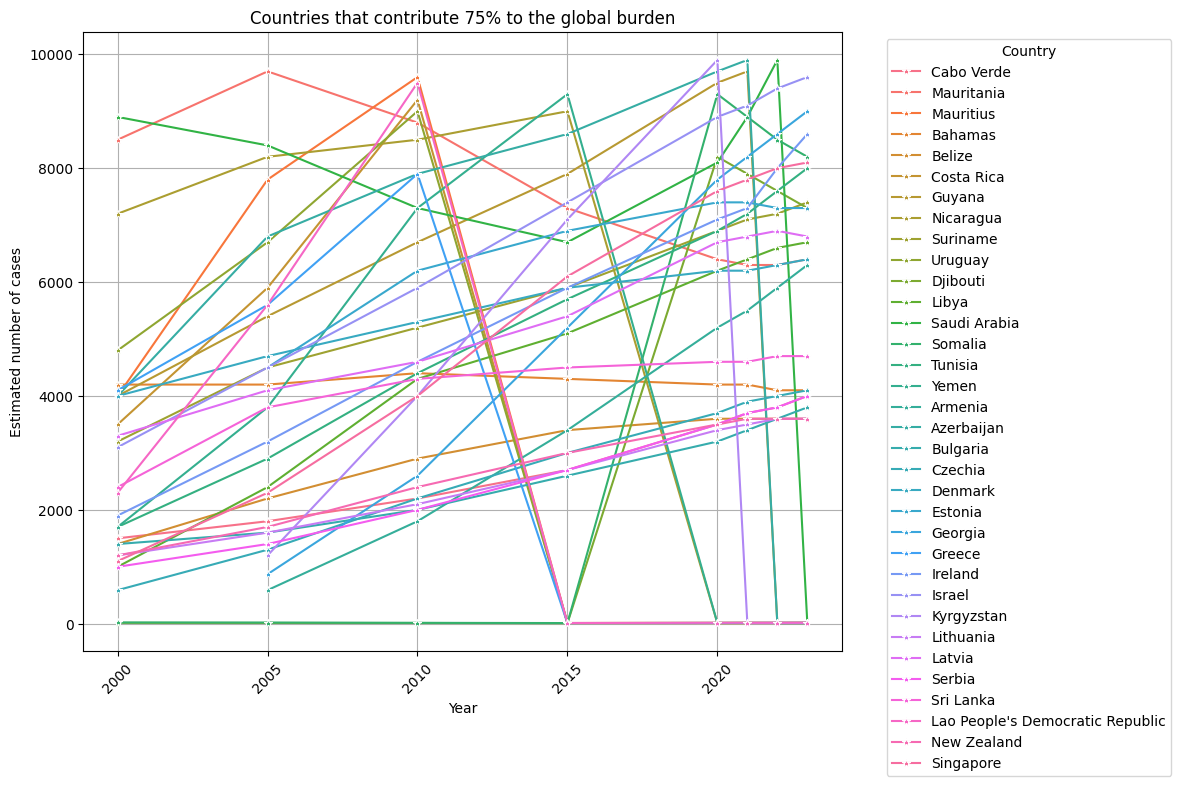

In [ ]:
# group the countries and their total global over the years

countries = df.groupby('Location')['NewValue'].sum().sort_values(ascending=False)

# calculate total sum
overall = countries.cumsum()
total = countries.sum()
overall_percent = overall/total

#getting countries contributing upto 75%
top_countries = list(overall_percent[overall_percent <= 0.75].index)

#getting the countries that fit the requirement
countries_df = df[df['Location'].isin(top_countries)]

#plotting the countries
plt.figure(figsize=(12, 8))
sns.lineplot(data=countries_df, x='Period', y='NewValue',hue='Location', marker='*')
plt.title("Countries that contribute 75% to the global burden")
plt.xlabel("Year")
plt.ylabel("Estimated number of cases")
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.grid(True)
plt.tight_layout()
plt.show()

2. -	Generate a visualization that displays the trend of HIV cases in the countries contributing to 75% of the burden within each WHO region (column called ParentLocationCode contains the WHO regions)

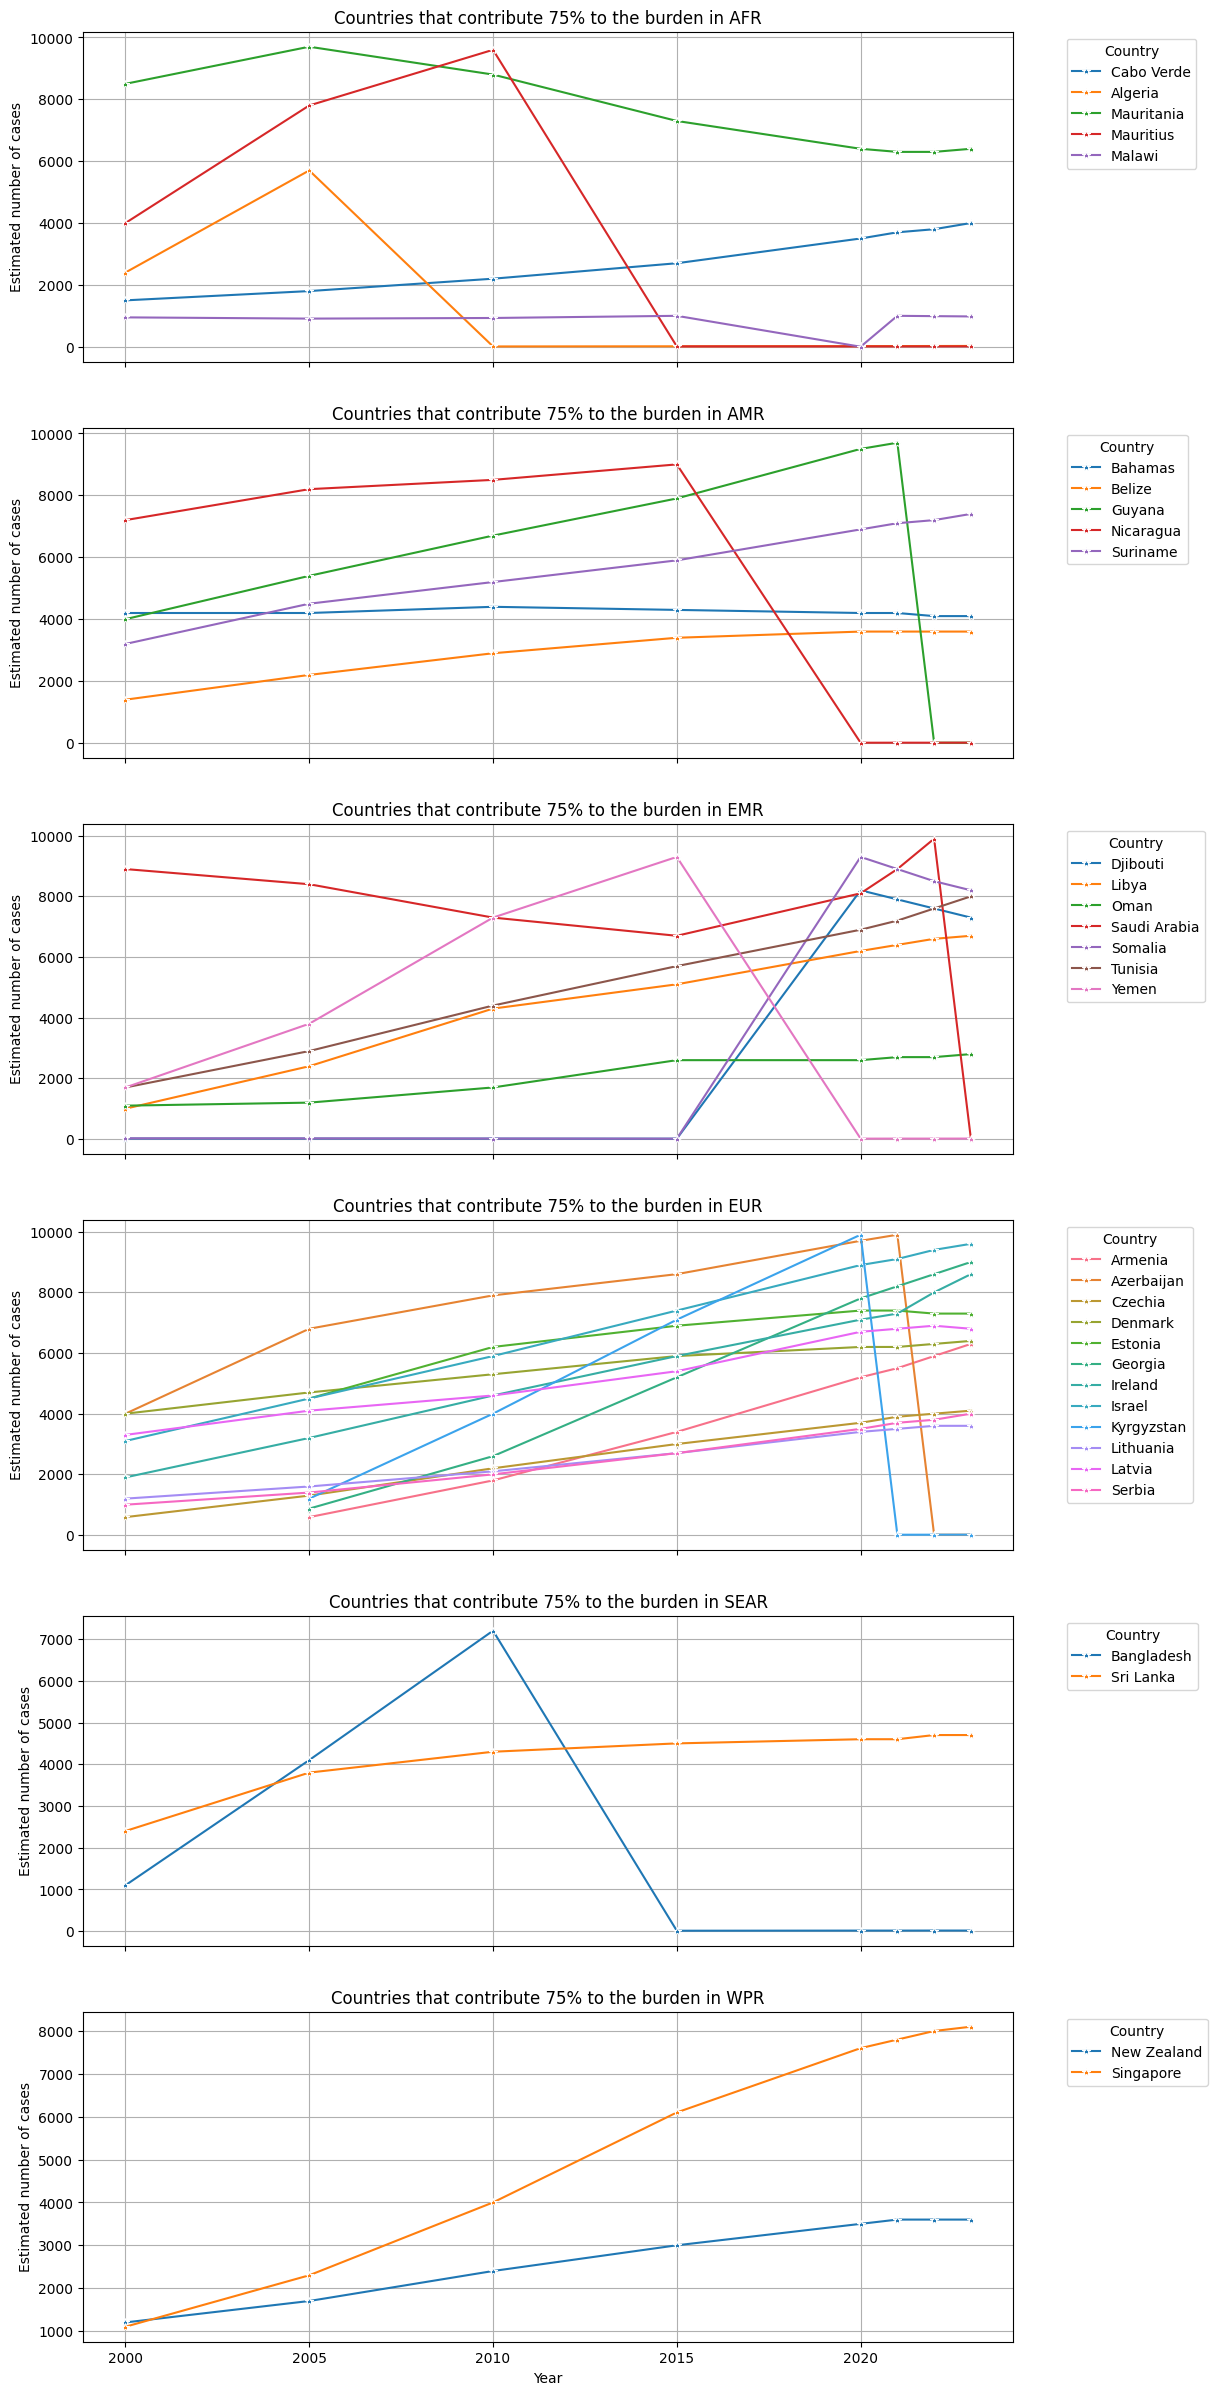

In [ ]:
#plot per WHO regions
regions = df['ParentLocationCode'].unique()

num_regions = len(regions)
fig, axs = plt.subplots(nrows=num_regions, figsize=(12, 5 * num_regions), sharex=True)

if num_regions == 1:
    axs = [axs]

#loop through each WHO region
for i, region in enumerate(regions):
    region_df = df[df['ParentLocationCode'] == region]
    region_country= region_df.groupby('Location')['NewValue'].sum().sort_values(ascending=False)
    overall = region_country.cumsum()
    total = region_country.sum()
    overall_percent = overall/total


    #get top 75% countries contributing in each region
    top_countries = list(overall_percent[overall_percent <= 0.75].index)
    top_region_df = region_df[region_df['Location'].isin(top_countries)]

    #plot
    sns.lineplot(data=top_region_df, x='Period', y='NewValue', hue='Location', marker='*', ax=axs[i])
    axs[i].set_title(f"Countries that contribute 75% to the burden in {region}")
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Estimated number of cases")
    axs[i].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[i].grid(True)

plt.show()


## Merging Datasets

In [ ]:
#import the multidimensional_poverty dataset

df2 = pd.read_excel('multidimensional_poverty.xlsx', skiprows=2 )
df2.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0        SSA        AGO     Angola        2018      IDREA        2018   
1        ECA        ALB    Albania        2012        HBS        2018   
2        LAC        ARG  Argentina        2010    EPHC-S2        2021   
3        ECA        ARM    Armenia        2010       ILCS        2021   
4        EAP        AUS  Australia        2010    SIH-LIS        2018   

  Unnamed: 6 Unnamed: 7  Unnamed: 8  Monetary (%) Educational attainment (%)  \
0          N          c           2     31.122005                  29.753423   
1          N          c           1      0.048107                    0.19238   
2          U          i           3      0.894218                    1.08532   
3          N          c           1      0.523521                          0   
4          N          I           3      0.516880                    1.71188   

  Educational enrollment (%) Electricity (%) Sanitation (%)  \
0                   27.44306       52.639532      53.637516   
1                          -         0.06025       6.579772   
2                   0.731351               0       0.257453   
3                   1.793004               0       0.397725   
4                          -               0              0   

  Drinking water (%)  Unnamed: 15  
0          32.106507    47.203606  
1           9.594966     0.293161  
2           0.364048     0.906573  
3           0.660082     0.523521  
4                  -     2.215770

In [ ]:
# rename unamed columns
df2.rename(columns={'Unnamed: 0': 'Region', 'Unnamed: 1': 'Country code', 'Unnamed: 2': 'Economy', 'Unnamed: 3': 'Reporting year', 'Unnamed: 4': 'Survey name', 'Unnamed: 5': 'Survey Year', 'Unnamed: 6': 'Survey coverage ', 'Unnamed: 7': 'Welfare type', 'Unnamed: 8': 'Survey comparability','Unnamed: 15': 'Multidimensional poverty headcount ratio(%)'}, inplace=True)
df2.head(10)

Region Country code       Economy  Reporting year Survey name  Survey Year  \
0    SSA          AGO        Angola            2018       IDREA         2018   
1    ECA          ALB       Albania            2012         HBS         2018   
2    LAC          ARG     Argentina            2010     EPHC-S2         2021   
3    ECA          ARM       Armenia            2010        ILCS         2021   
4    EAP          AUS     Australia            2010     SIH-LIS         2018   
5    ECA          AUT       Austria            2009     EU-SILC         2022   
6    SSA          BDI       Burundi            2013      EICVMB         2020   
7    ECA          BEL       Belgium            2009     EU-SILC         2022   
8    SSA          BEN         Benin            2015       EHCVM         2021   
9    SSA          BFA  Burkina Faso            2014       EHCVM         2021   

  Survey coverage  Welfare type  Survey comparability  Monetary (%)  \
0                N            c                     2     31.122005   
1                N            c                     1      0.048107   
2                U            i                     3      0.894218   
3                N            c                     1      0.523521   
4                N            I                     3      0.516880   
5                N            i                     2      0.485822   
6                N            c                     1     62.065762   
7                N            i                     2      0.029965   
8                N            c                     1     12.723279   
9                N            c                     3     25.277072   

  Educational attainment (%) Educational enrollment (%) Electricity (%)  \
0                  29.753423                   27.44306       52.639532   
1                    0.19238                          -         0.06025   
2                    1.08532                   0.731351               0   
3                          0                   1.793004               0   
4                    1.71188                          -               0   
5                   0.176422                          -               0   
6                  44.881231                  34.211618       90.568537   
7                    0.64869                          -               0   
8                  49.023893                  31.661823       34.818304   
9                  47.893941                  51.009065       35.258174   

  Sanitation (%) Drinking water (%)  \
0      53.637516          32.106507   
1       6.579772           9.594966   
2       0.257453           0.364048   
3       0.397725           0.660082   
4              0                  -   
5              -                  0   
6      91.007495          12.021417   
7              -                  0   
8      76.649594           24.10913   
9      58.732605          17.327691   

   Multidimensional poverty headcount ratio(%)  
0                                    47.203606  
1                                     0.293161  
2                                     0.906573  
3                                     0.523521  
4                                     2.215770  
5                                     0.662245  
6                                    79.209852  
7                                     0.679716  
8                                    45.443240  
9                                    52.981192

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IndicatorCode        1552 non-null   object 
 1   Indicator            1552 non-null   object 
 2   ValueType            1552 non-null   object 
 3   ParentLocationCode   1552 non-null   object 
 4   ParentLocation       1552 non-null   object 
 5   Location type        1552 non-null   object 
 6   SpatialDimValueCode  1552 non-null   object 
 7   Location             1552 non-null   object 
 8   Period type          1552 non-null   object 
 9   Period               1552 non-null   int64  
 10  Value                1552 non-null   object 
 11  NewValue             1084 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 145.6+ KB


In [ ]:
df.describe()

Period     NewValue
count  1552.000000  1084.000000
mean   2014.500000  1432.404982
std       8.080351  2446.006852
min    2000.000000     1.000000
25%    2008.750000    30.000000
50%    2017.500000   140.000000
75%    2021.250000  1500.000000
max    2023.000000  9900.000000

## Data Cleaning

In [ ]:
#check for missing values
df2.isna().sum()

Region                                         0
Country code                                   0
Economy                                        0
Reporting year                                 0
Survey name                                    0
Survey Year                                    0
Survey coverage                                0
Welfare type                                   0
Survey comparability                           0
Monetary (%)                                   0
Educational attainment (%)                     0
Educational enrollment (%)                     0
Electricity (%)                                0
Sanitation (%)                                 0
Drinking water (%)                             0
Multidimensional poverty headcount ratio(%)    0
dtype: int64

In [ ]:
#check for null values
df2.isnull().sum()

Region                                         0
Country code                                   0
Economy                                        0
Reporting year                                 0
Survey name                                    0
Survey Year                                    0
Survey coverage                                0
Welfare type                                   0
Survey comparability                           0
Monetary (%)                                   0
Educational attainment (%)                     0
Educational enrollment (%)                     0
Electricity (%)                                0
Sanitation (%)                                 0
Drinking water (%)                             0
Multidimensional poverty headcount ratio(%)    0
dtype: int64

In [ ]:
#check for duplicates
df2.duplicated().sum()

np.int64(0)

In [ ]:
#avoid repetition of columns and keep some columns
columns_retained = ['Economy', 'Monetary (%)', 'Educational attainment (%)', 'Educational enrollment (%)', 'Electricity (%)', 'Sanitation (%)', 'Drinking water (%)', 'Multidimensional poverty headcount ratio(%)']
df2 = df2[columns_retained]
df2.head()

Economy  Monetary (%) Educational attainment (%)  \
0     Angola     31.122005                  29.753423   
1    Albania      0.048107                    0.19238   
2  Argentina      0.894218                    1.08532   
3    Armenia      0.523521                          0   
4  Australia      0.516880                    1.71188   

  Educational enrollment (%) Electricity (%) Sanitation (%)  \
0                   27.44306       52.639532      53.637516   
1                          -         0.06025       6.579772   
2                   0.731351               0       0.257453   
3                   1.793004               0       0.397725   
4                          -               0              0   

  Drinking water (%)  Multidimensional poverty headcount ratio(%)  
0          32.106507                                    47.203606  
1           9.594966                                     0.293161  
2           0.364048                                     0.906573  
3           0.660082                                     0.523521  
4                  -                                     2.215770

In [ ]:
#convert columns with (-) to  NAN tonumeric
columns_convert = ['Monetary (%)', 'Educational attainment (%)', 'Educational enrollment (%)', 'Electricity (%)', 'Sanitation (%)', 'Drinking water (%)']
df2[columns_convert] = df2[columns_convert].replace('-', np.nan).apply(pd.to_numeric, errors='coerce')
df2.head(10)

<ipython-input-21-74e1ec35b399>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[columns_convert] = df2[columns_convert].replace('-', np.nan).apply(pd.to_numeric, errors='coerce')


Economy  Monetary (%)  Educational attainment (%)  \
0        Angola     31.122005                   29.753423   
1       Albania      0.048107                    0.192380   
2     Argentina      0.894218                    1.085320   
3       Armenia      0.523521                    0.000000   
4     Australia      0.516880                    1.711880   
5       Austria      0.485822                    0.176422   
6       Burundi     62.065762                   44.881231   
7       Belgium      0.029965                    0.648690   
8         Benin     12.723279                   49.023893   
9  Burkina Faso     25.277072                   47.893941   

   Educational enrollment (%)  Electricity (%)  Sanitation (%)  \
0                   27.443060        52.639532       53.637516   
1                         NaN         0.060250        6.579772   
2                    0.731351         0.000000        0.257453   
3                    1.793004         0.000000        0.397725   
4                         NaN         0.000000        0.000000   
5                         NaN         0.000000             NaN   
6                   34.211618        90.568537       91.007495   
7                         NaN         0.000000             NaN   
8                   31.661823        34.818304       76.649594   
9                   51.009065        35.258174       58.732605   

   Drinking water (%)  Multidimensional poverty headcount ratio(%)  
0           32.106507                                    47.203606  
1            9.594966                                     0.293161  
2            0.364048                                     0.906573  
3            0.660082                                     0.523521  
4                 NaN                                     2.215770  
5            0.000000                                     0.662245  
6           12.021417                                    79.209852  
7            0.000000                                     0.679716  
8           24.109130                                    45.443240  
9           17.327691                                    52.981192

In [ ]:
# drop rows with NAN values
df2 = df2.dropna(subset=columns_convert)
df2.head(10)

Economy  Monetary (%)  Educational attainment (%)  \
0         Angola     31.122005                   29.753423   
2      Argentina      0.894218                    1.085320   
3        Armenia      0.523521                    0.000000   
6        Burundi     62.065762                   44.881231   
8          Benin     12.723279                   49.023893   
9   Burkina Faso     25.277072                   47.893941   
10    Bangladesh      5.008757                    9.497152   
13       Bolivia      1.964501                   12.281151   
14        Brazil      3.505301                   13.163611   
15        Bhutan      0.001539                   26.586553   

    Educational enrollment (%)  Electricity (%)  Sanitation (%)  \
0                    27.443060        52.639532       53.637516   
2                     0.731351         0.000000        0.257453   
3                     1.793004         0.000000        0.397725   
6                    34.211618        90.568537       91.007495   
8                    31.661823        34.818304       76.649594   
9                    51.009065        35.258174       58.732605   
10                    6.686347         2.374333       27.518305   
13                    1.383869         2.938617       13.905990   
14                    0.446158         0.205422       32.579765   
15                    3.752971         0.229128        7.075230   

    Drinking water (%)  Multidimensional poverty headcount ratio(%)  
0            32.106507                                    47.203606  
2             0.364048                                     0.906573  
3             0.660082                                     0.523521  
6            12.021417                                    79.209852  
8            24.109130                                    45.443240  
9            17.327691                                    52.981192  
10            1.998808                                     6.607784  
13            9.903722                                     4.539775  
14            1.300809                                     4.071913  
15            0.044948                                     1.301685

In [ ]:
#merging df and df2
#rename columns economy and location since the data is similar
df.rename(columns={'Location': 'Country'}, inplace=True)
df2.rename(columns={'Economy': 'Country'}, inplace=True)

df3 = pd.merge(df, df2, on='Country', how='inner')
df3.head()

IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode Country Period type  Period  \
0                 AGO  Angola        Year    2023   
1                 AGO  Angola        Year    2022   
2                 AGO  Angola        Year    2021   
3                 AGO  Angola        Year    2020   
4                 AGO  Angola        Year    2015   

                         Value  NewValue  Monetary (%)  \
0  320 000 [280 000 - 380 000]     320.0     31.122005   
1  320 000 [280 000 - 380 000]     320.0     31.122005   
2  320 000 [280 000 - 380 000]     320.0     31.122005   
3  320 000 [280 000 - 370 000]     320.0     31.122005   
4  300 000 [260 000 - 350 000]     300.0     31.122005   

   Educational attainment (%)  Educational enrollment (%)  Electricity (%)  \
0                   29.753423                    27.44306        52.639532   
1                   29.753423                    27.44306        52.639532   
2                   29.753423                    27.44306        52.639532   
3                   29.753423                    27.44306        52.639532   
4                   29.753423                    27.44306        52.639532   

   Sanitation (%)  Drinking water (%)  \
0       53.637516           32.106507   
1       53.637516           32.106507   
2       53.637516           32.106507   
3       53.637516           32.106507   
4       53.637516           32.106507   

   Multidimensional poverty headcount ratio(%)  
0                                    47.203606  
1                                    47.203606  
2                                    47.203606  
3                                    47.203606  
4                                    47.203606

## Analyzing HIV Cases with multidimensional poverty and how it has affected some factors such as educational enrollment based on the countries and years

#### Analyzing the relationship between HIV cases and educational enrollment

In [ ]:
# rename columns to be syntax error free
df3 = df3.rename(columns={'Monetary (%)': 'Monetary_percentage', 'Educational attainment (%)': 'Educational_attainment_percentage', 'Educational enrollment (%)': 'Educational_enrollment_percentage', 'Electricity (%)': 'Electricity_percentage', 'Sanitation (%)': 'Sanitation_percentage', 'Drinking water (%)': 'Drinking_water_percentage'})
df3.head()


IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode Country Period type  Period  \
0                 AGO  Angola        Year    2023   
1                 AGO  Angola        Year    2022   
2                 AGO  Angola        Year    2021   
3                 AGO  Angola        Year    2020   
4                 AGO  Angola        Year    2015   

                         Value  NewValue  Monetary_percentage  \
0  320 000 [280 000 - 380 000]     320.0            31.122005   
1  320 000 [280 000 - 380 000]     320.0            31.122005   
2  320 000 [280 000 - 380 000]     320.0            31.122005   
3  320 000 [280 000 - 370 000]     320.0            31.122005   
4  300 000 [260 000 - 350 000]     300.0            31.122005   

   Educational_attainment_percentage  Educational_enrollment_percentage  \
0                          29.753423                           27.44306   
1                          29.753423                           27.44306   
2                          29.753423                           27.44306   
3                          29.753423                           27.44306   
4                          29.753423                           27.44306   

   Electricity_percentage  Sanitation_percentage  Drinking_water_percentage  \
0               52.639532              53.637516                  32.106507   
1               52.639532              53.637516                  32.106507   
2               52.639532              53.637516                  32.106507   
3               52.639532              53.637516                  32.106507   
4               52.639532              53.637516                  32.106507   

   Multidimensional poverty headcount ratio(%)  
0                                    47.203606  
1                                    47.203606  
2                                    47.203606  
3                                    47.203606  
4                                    47.203606

In [ ]:
#modelling
model = smf.ols(formula='NewValue ~ Educational_enrollment_percentage', data=df3, groups=df3['Country'], re_formula="~Period" ).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:               NewValue   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.660
Date:                Fri, 25 Apr 2025   Prob (F-statistic):            0.00343
Time:                        16:59:47   Log-Likelihood:                -3845.3
No. Observations:                 424   AIC:                             7695.
Df Residuals:                     422   BIC:                             7703.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['groups', 're_formula']
  warnings.warn(msg, ValueWarning)


<ipython-input-51-87f499c16e71>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


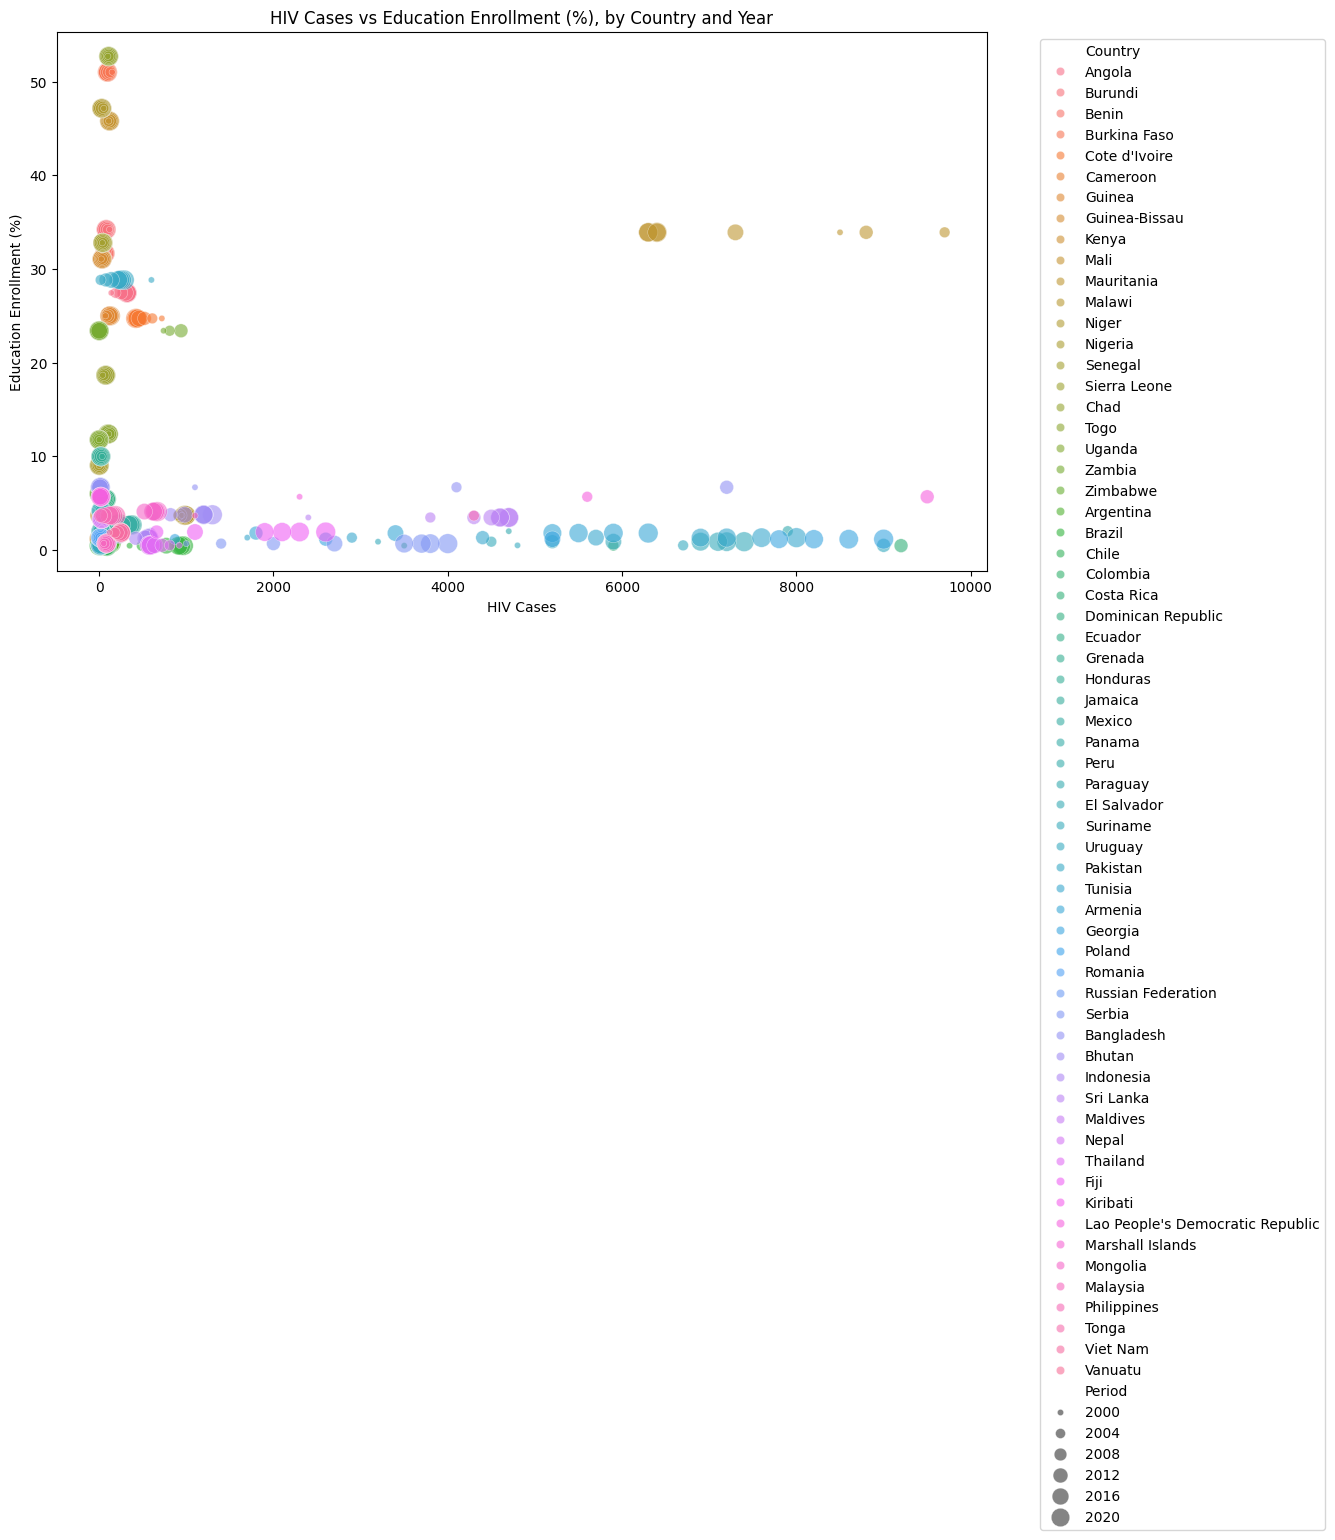

In [ ]:
plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=df3,
    x="NewValue",
    y="Educational_enrollment_percentage",
    hue="Country",
    size="Period",
    sizes=(20, 200),
    alpha=0.6
)

plt.title("HIV Cases vs Education Enrollment (%), by Country and Year")
plt.xlabel("HIV Cases")
plt.ylabel("Education Enrollment (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


#### Analyzing the relationship between HIV cases and monetary

In [ ]:
#modelling
model = smf.ols(formula='NewValue ~ Monetary_percentage', data=df3, groups=df3['Country'], re_formula="~Period" ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NewValue   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.18
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           7.73e-07
Time:                        17:43:46   Log-Likelihood:                -3837.3
No. Observations:                 424   AIC:                             7679.
Df Residuals:                     422   BIC:                             7687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1395.6770    

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['groups', 're_formula']
  warnings.warn(msg, ValueWarning)


<ipython-input-53-f553252758c1>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


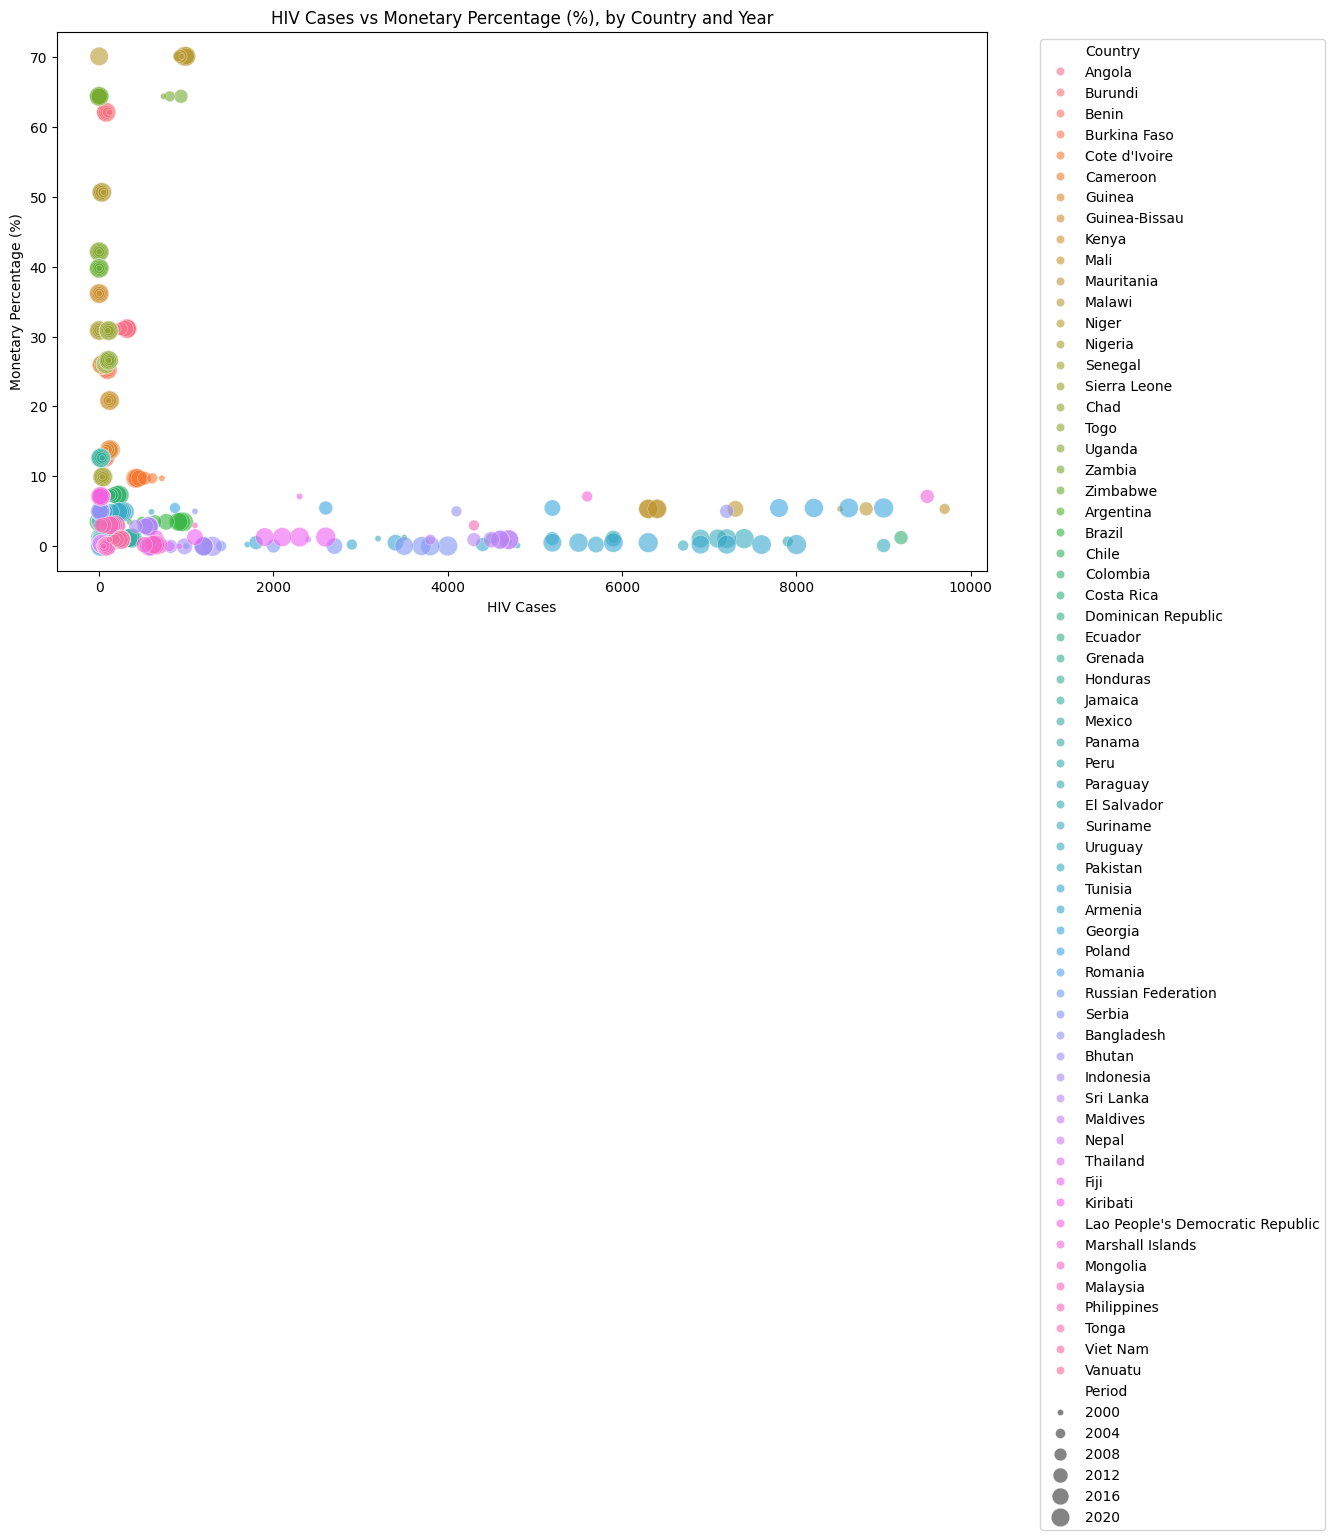

In [ ]:
plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=df3,
    x="NewValue",
    y="Monetary_percentage",
    hue="Country",
    size="Period",
    sizes=(20, 200),
    alpha=0.6
)

plt.title("HIV Cases vs Monetary Percentage (%), by Country and Year")
plt.xlabel("HIV Cases")
plt.ylabel("Monetary Percentage (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


#### Analyzing the relationship between HIV cases and Sanitation percentage

In [ ]:
#modelling
model = smf.ols(formula='NewValue ~ Sanitation_percentage', data=df3, groups=df3['Country'], re_formula="~Period" ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NewValue   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     19.27
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.44e-05
Time:                        15:48:25   Log-Likelihood:                -3840.1
No. Observations:                 424   AIC:                             7684.
Df Residuals:                     422   BIC:                             7692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1466.36

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['groups', 're_formula']
  warnings.warn(msg, ValueWarning)


<ipython-input-26-aecf68ba5bd2>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


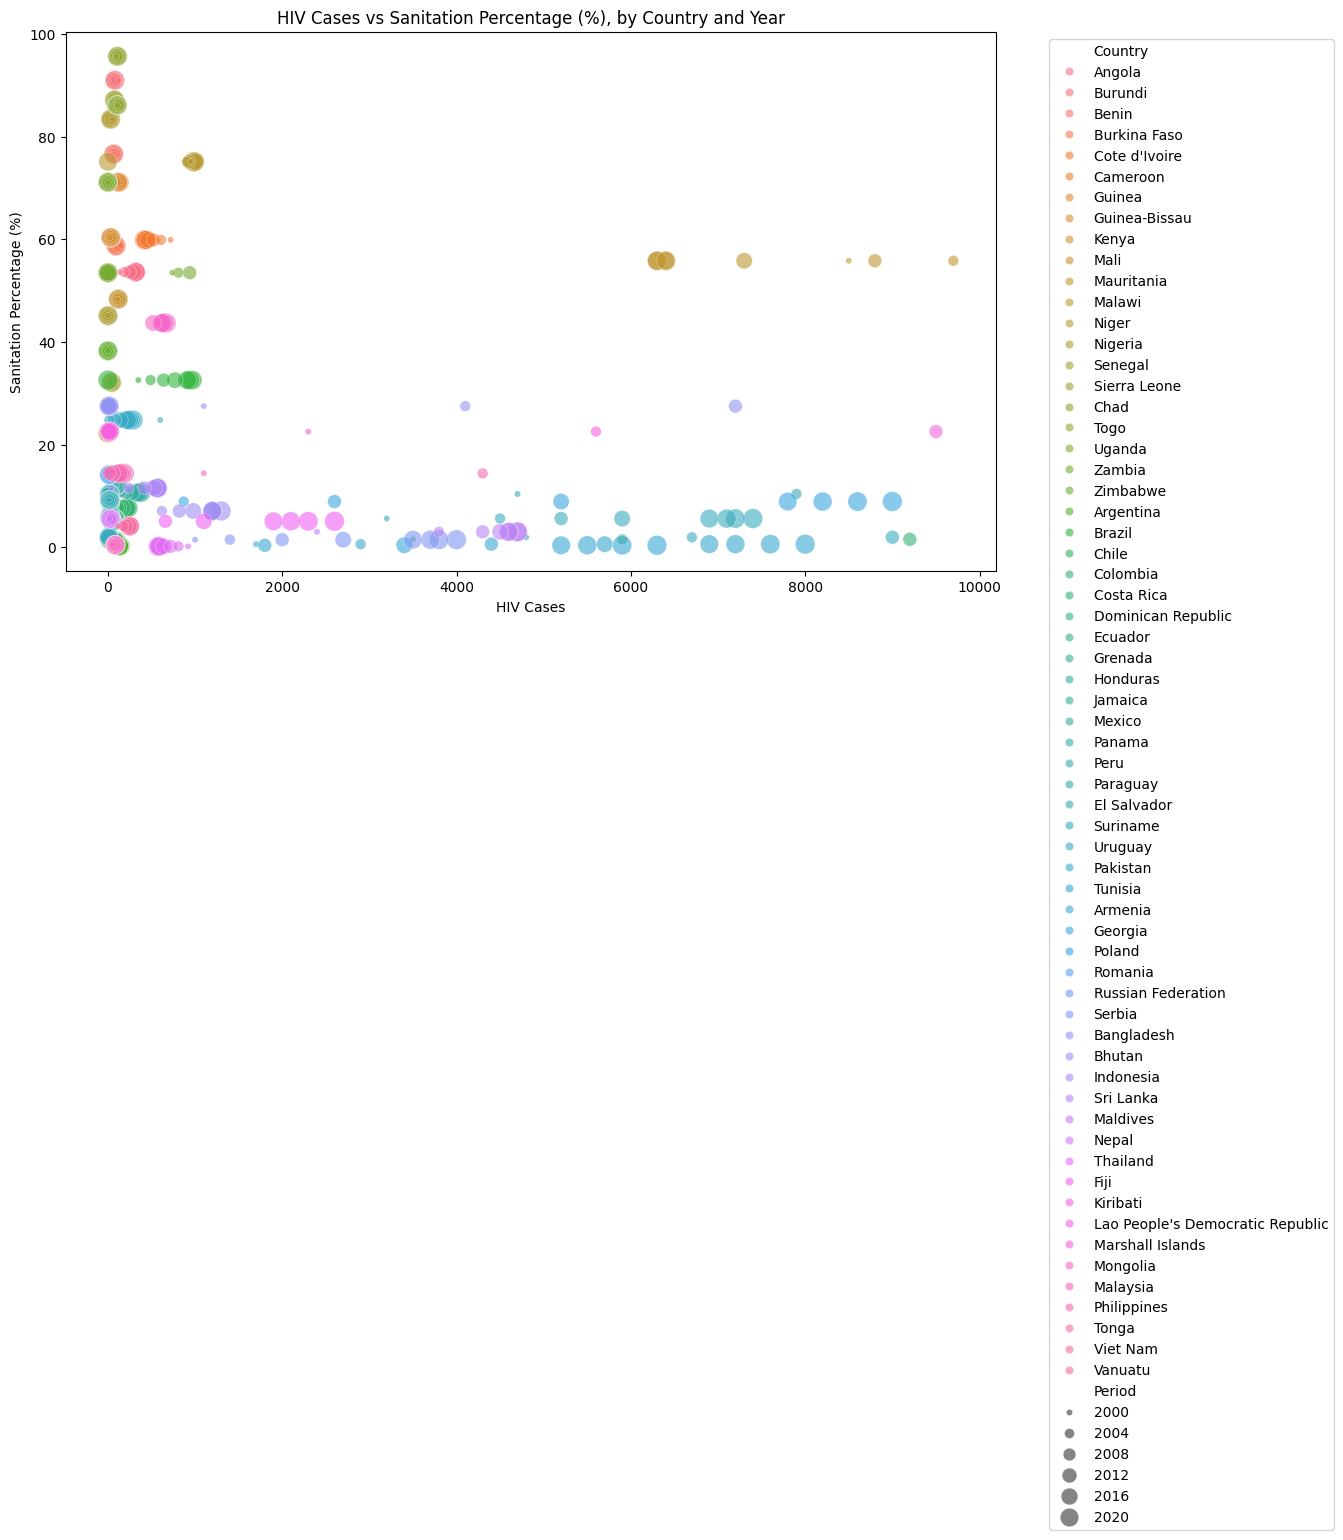

In [ ]:
plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=df3,
    x="NewValue",
    y="Sanitation_percentage",
    hue="Country",
    size="Period",
    sizes=(20, 200),
    alpha=0.6
)

plt.title("HIV Cases vs Sanitation Percentage (%), by Country and Year")
plt.xlabel("HIV Cases")
plt.ylabel("Sanitation Percentage (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


In [ ]:
#modelling
model = smf.ols(formula='NewValue ~ Educational_attainment_percentage', data=df3, groups=df3['Country'], re_formula="~Period" ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NewValue   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.727
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0171
Time:                        15:56:26   Log-Likelihood:                -3846.7
No. Observations:                 424   AIC:                             7697.
Df Residuals:                     422   BIC:                             7706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['groups', 're_formula']
  warnings.warn(msg, ValueWarning)


<ipython-input-28-69f887af4edf>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


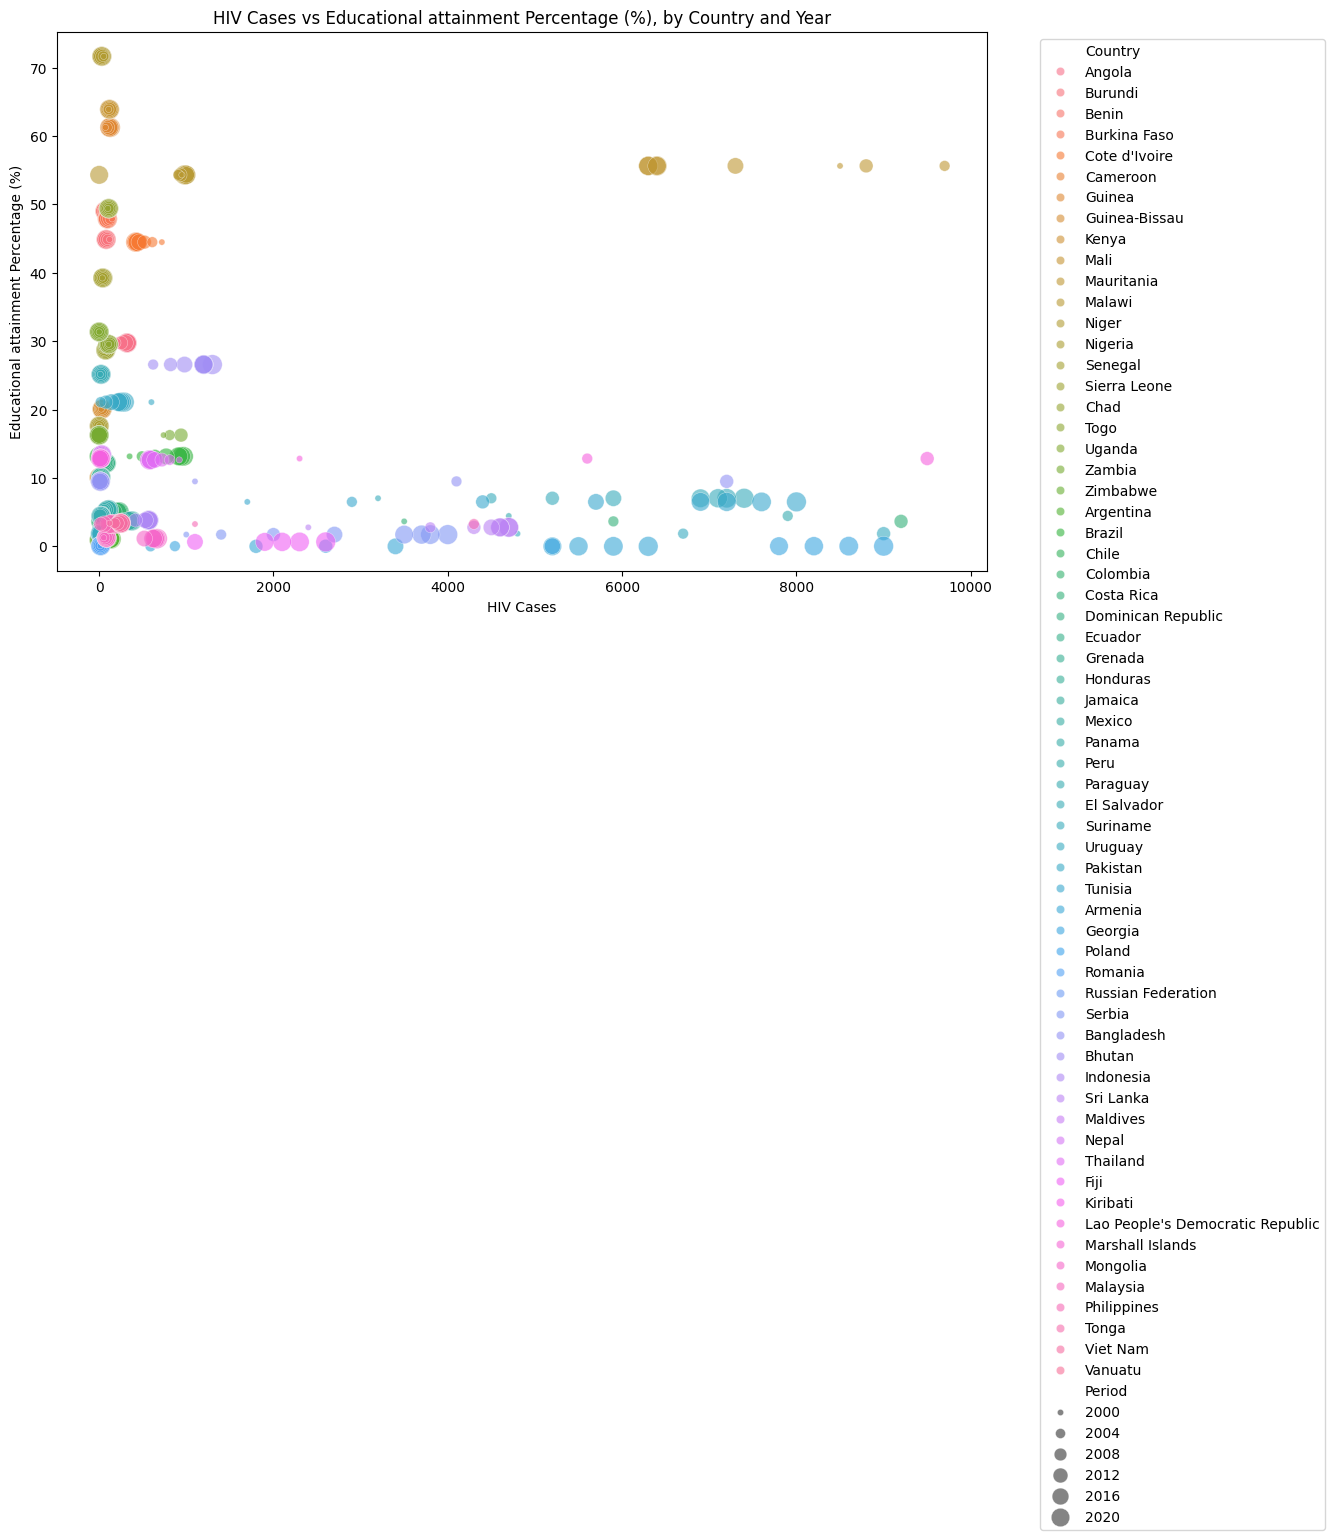

In [ ]:
plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=df3,
    x="NewValue",
    y="Educational_attainment_percentage",
    hue="Country",
    size="Period",
    sizes=(20, 200),
    alpha=0.6
)

plt.title("HIV Cases vs Educational attainment Percentage (%), by Country and Year")
plt.xlabel("HIV Cases")
plt.ylabel("Educational attainment Percentage (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


In [ ]:
#modelling
model = smf.ols(formula='NewValue ~ Drinking_water_percentage', data=df3, groups=df3['Country'], re_formula="~Period" ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NewValue   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.458
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0353
Time:                        16:00:27   Log-Likelihood:                -3847.4
No. Observations:                 424   AIC:                             7699.
Df Residuals:                     422   BIC:                             7707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['groups', 're_formula']
  warnings.warn(msg, ValueWarning)


<ipython-input-30-7cd9b2f18a5b>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


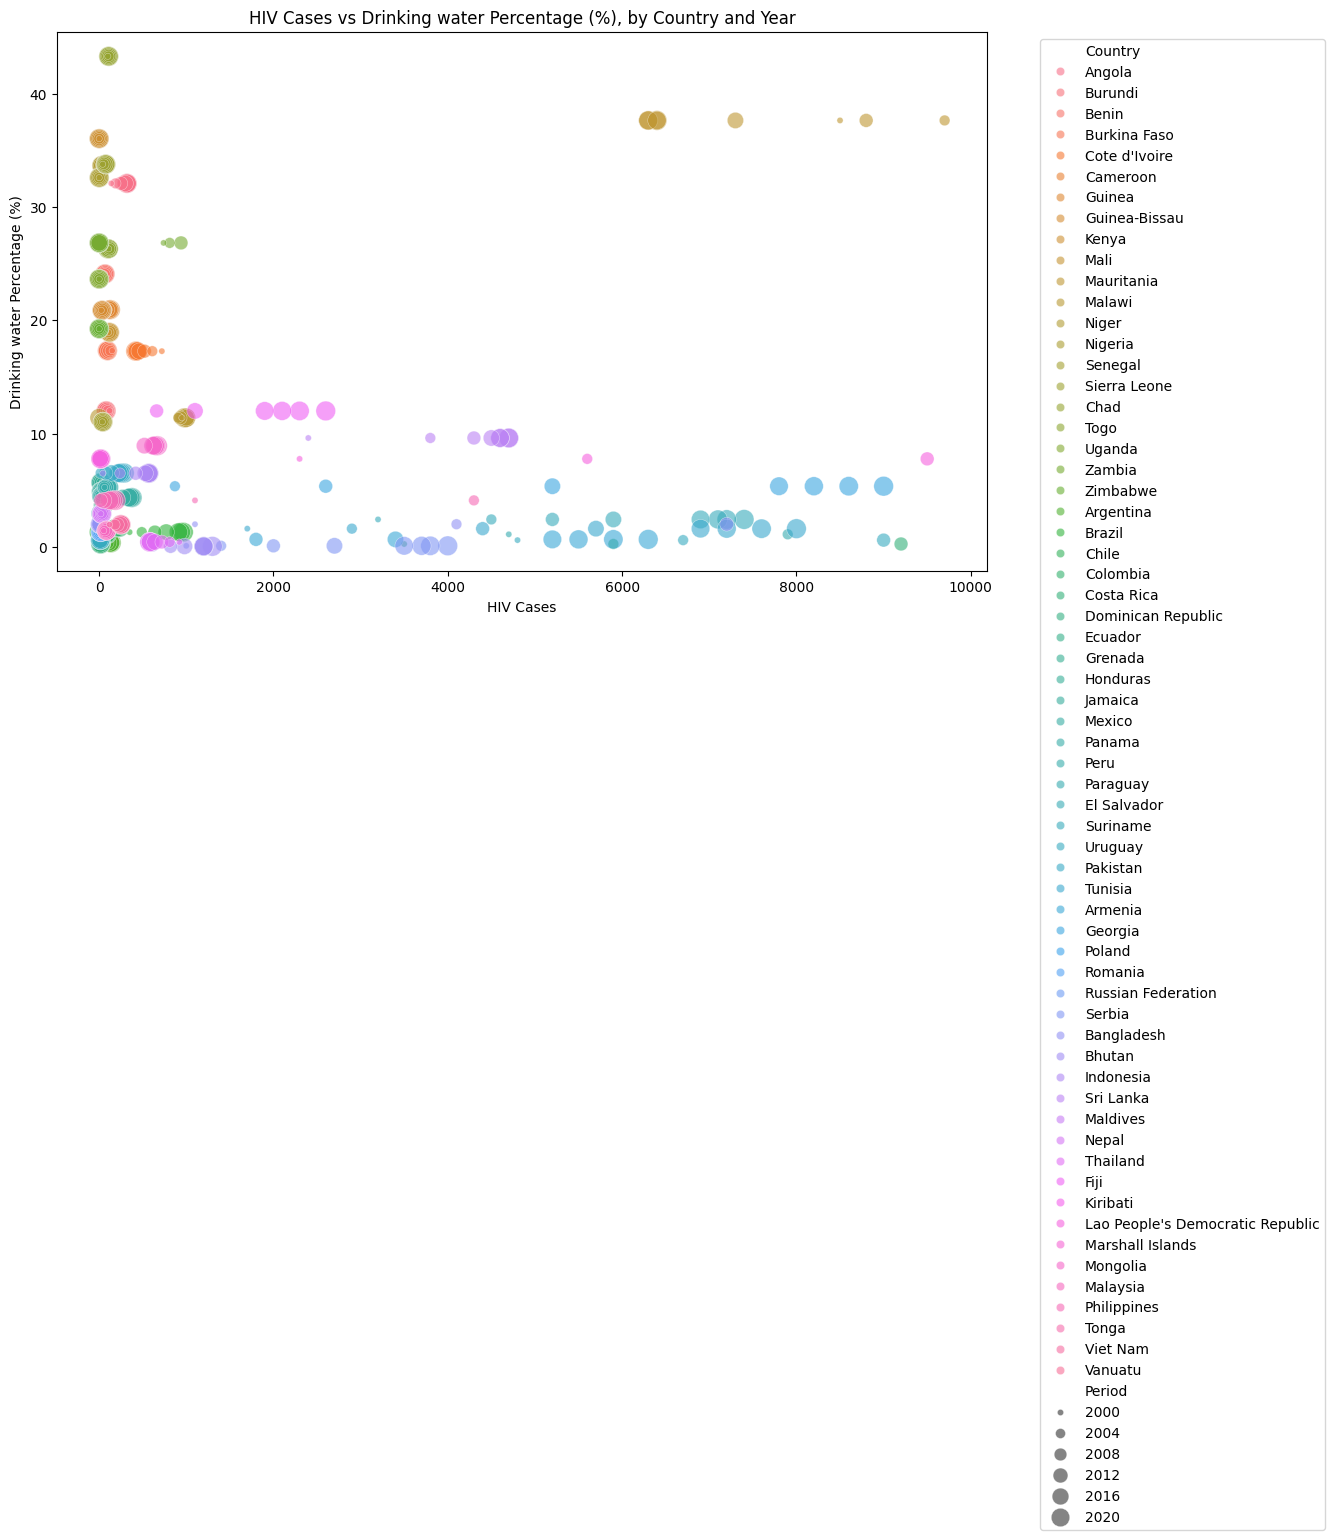

In [ ]:
plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=df3,
    x="NewValue",
    y="Drinking_water_percentage",
    hue="Country",
    size="Period",
    sizes=(20, 200),
    alpha=0.6
)

plt.title("HIV Cases vs Drinking water Percentage (%), by Country and Year")
plt.xlabel("HIV Cases")
plt.ylabel("Drinking water Percentage (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

## Findings
- When comparing HIV cases with multidimensional poverty, we can see that the percentage of education enrollment decreases with increase in HIV cases. We can see that in countries such as Pakistan and Jamaica with HIV cases over 8000 having an average number 0-10% education enrollment percentage. This shows that many people with HIV find it difficult to enroll in school.
- When comparing HIV cases with education attainment percentage, we can see that the percentage of education attainment decreases with increase in HIV cases. We see that in countries that have over 4000 HIV cases, the education attainment for such people decreases with achieving a maximum of 10% in education attainment.
- When comparing HIV cases with monetary percentage, the monetary percentage averages at about 0 - 10% with countries with HIV cases over about 4000 showing that most of this patients or HIV cases lack funds to cater for their own needs since most of the money is assumed to be used on medical expenses.
- When comparing HIV cases with sanitation percentage, the sanitation percentage varies between different countries as some countries with over HIV cases over such as Kenya, Niger and Mauritania have been able to achieve a sanitation percentage of over 60% which is a good percentage, showing that good sanitation is maintained by such countries with high HIV cases unlike other countries with the same number of cases have a low percentage of less 10%. This shows that such countries do not maintain a good sanitation for such patients with HIV.



## 2. -	Filter data for the eight countries belonging to the East African Community (list here: https://www.eac.int/overview-of-eac)

In [ ]:
df4 = pd.read_csv('dataset_datascience.csv', encoding='latin1')
df4.head()

<ipython-input-2-8f80439b8111>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('dataset_datascience.csv', encoding='latin1')


REF_AREA Geographic area Regional group                Indicator    Sex  \
0      AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
1      AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
2      AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
3      AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
4      AFG     Afghanistan            NaN  Neonatal mortality rate  Total   

  Wealth Quintile                              Series Name Series Year  \
0           Total  Afghanistan Health Survey 2018 (Direct)        2018   
1           Total  Afghanistan Health Survey 2018 (Direct)        2018   
2           Total  Afghanistan Health Survey 2018 (Direct)        2018   
3           Total  Afghanistan Health Survey 2018 (Direct)        2018   
4           Total  Afghanistan Health Survey 2018 (Direct)        2018   

   Reference Date  Observation Value  ...  Country notes  Observation Status  \
0          1995.5          47.869030  ...            NaN  Excluded from IGME   
1          2000.5          35.349317  ...            NaN  Excluded from IGME   
2          2005.5          27.699219  ...            NaN  Excluded from IGME   
3          2010.5          21.056003  ...            NaN  Excluded from IGME   
4          2015.5          20.167379  ...            NaN  Excluded from IGME   

                Unit of measure Series Type Series Category  \
0  Deaths per 1,000 live births      Direct          Others   
1  Deaths per 1,000 live births      Direct          Others   
2  Deaths per 1,000 live births      Direct          Others   
3  Deaths per 1,000 live births      Direct          Others   
4  Deaths per 1,000 live births      Direct          Others   

                             Series Method Age Group of Women  \
0  Survey/Census with Full Birth Histories                NaN   
1  Survey/Census with Full Birth Histories                NaN   
2  Survey/Census with Full Birth Histories                NaN   
3  Survey/Census with Full Birth Histories                NaN   
4  Survey/Census with Full Birth Histories                NaN   

  Time Since First Birth Definition Interval  
0                    NaN        NaN      5.0  
1                    NaN        NaN      5.0  
2                    NaN        NaN      5.0  
3                    NaN        NaN      5.0  
4                    NaN        NaN      5.0  

[5 rows x 23 columns]

In [ ]:
#filter eac countries
eac_countries = ['Burundi', 'Democratic Republic of the Congo', 'Kenya', 'Rwanda', 'South Sudan', 'Somalia', 'Tanzania', 'Uganda']
df4 = df4[df4['Geographic area'].isin(eac_countries)]
df4.head()

REF_AREA Geographic area Regional group                Indicator    Sex  \
6387      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6388      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6389      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6390      BDI         Burundi            NaN  Neonatal mortality rate  Total   
6391      BDI         Burundi            NaN  Neonatal mortality rate  Total   

     Wealth Quintile                                       Series Name  \
6387           Total  Demographic and Health Survey 2016-2017 (Direct)   
6388           Total  Demographic and Health Survey 2016-2017 (Direct)   
6389           Total  Demographic and Health Survey 2016-2017 (Direct)   
6390           Total  Demographic and Health Survey 2016-2017 (Direct)   
6391           Total  Demographic and Health Survey 2016-2017 (Direct)   

     Series Year  Reference Date  Observation Value  ...  Country notes  \
6387   2016-2017          1993.5           36.41348  ...            NaN   
6388   2016-2017          1998.5           41.25996  ...            NaN   
6389   2016-2017          2003.5           32.83915  ...            NaN   
6390   2016-2017          2008.5           28.46557  ...            NaN   
6391   2016-2017          2013.5           23.70623  ...            NaN   

      Observation Status               Unit of measure Series Type  \
6387  Excluded from IGME  Deaths per 1,000 live births      Direct   
6388    Included in IGME  Deaths per 1,000 live births      Direct   
6389    Included in IGME  Deaths per 1,000 live births      Direct   
6390    Included in IGME  Deaths per 1,000 live births      Direct   
6391    Included in IGME  Deaths per 1,000 live births      Direct   

     Series Category                            Series Method  \
6387             DHS  Survey/Census with Full Birth Histories   
6388             DHS  Survey/Census with Full Birth Histories   
6389             DHS  Survey/Census with Full Birth Histories   
6390             DHS  Survey/Census with Full Birth Histories   
6391             DHS  Survey/Census with Full Birth Histories   

     Age Group of Women Time Since First Birth Definition Interval  
6387                NaN                    NaN        NaN      5.0  
6388                NaN                    NaN        NaN      5.0  
6389                NaN                    NaN        NaN      5.0  
6390                NaN                    NaN        NaN      5.0  
6391                NaN                    NaN        NaN      5.0  

[5 rows x 23 columns]

## -	Visualize the latest estimate of each indicator at the country level using shapefiles, which can be downloaded from www.gadm.org.

#### Kenya

In [ ]:
import zipfile
import os
import geopandas as gpd

In [ ]:
#extract the zipfile
path = 'gadm41_KEN_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_KEN_shp')


In [ ]:
print(os.listdir('gadm41_KEN_shp'))

['gadm41_KEN_3.shx', 'gadm41_KEN_2.shx', 'gadm41_KEN_0.prj', 'gadm41_KEN_0.dbf', 'gadm41_KEN_1.cpg', 'gadm41_KEN_1.dbf', 'gadm41_KEN_1.shp', 'gadm41_KEN_0.shx', 'gadm41_KEN_2.cpg', 'gadm41_KEN_3.cpg', 'gadm41_KEN_3.prj', 'gadm41_KEN_2.prj', 'gadm41_KEN_0.cpg', 'gadm41_KEN_1.prj', 'gadm41_KEN_2.shp', 'gadm41_KEN_3.shp', 'gadm41_KEN_2.dbf', 'gadm41_KEN_0.shp', 'gadm41_KEN_3.dbf', 'gadm41_KEN_1.shx']


In [ ]:
#load the shapefile
kenya_shapefile = gpd.read_file('gadm41_KEN_shp/gadm41_KEN_1.shp')
kenya_shapefile.head()

GID_1 GID_0 COUNTRY           NAME_1 VARNAME_1 NL_NAME_1  TYPE_1  \
0  KEN.1_1   KEN   Kenya          Baringo        NA        NA  County   
1  KEN.2_1   KEN   Kenya            Bomet        NA        NA  County   
2  KEN.3_1   KEN   Kenya          Bungoma        NA        NA  County   
3  KEN.4_1   KEN   Kenya            Busia        NA        NA  County   
4  KEN.5_1   KEN   Kenya  Elgeyo-Marakwet        NA        NA  County   

  ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0    County   30  KE.BA  KE-01   
1    County   36  KE.BO  KE-02   
2    County   39  KE.BN  KE-03   
3    County   40  KE.BS  KE-04   
4    County   28  KE.EM     NA   

                                            geometry  
0  MULTIPOLYGON (((35.76164 -0.19037, 35.74926 -0...  
1  POLYGON ((35.26126 -1.01593, 35.26072 -1.0159,...  
2  POLYGON ((34.87783 0.8339, 34.88717 0.83884, 3...  
3  POLYGON ((34.02922 -0.01415, 34.02854 -0.01457...  
4  MULTIPOLYGON (((35.52716 0.21674, 35.52614 0.2...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for kenya
kenya_df4 = df4[df4['Geographic area'] == 'Kenya']

#latest estimate for indicator
latest_kenya = kenya_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_kenya[['Indicator','Observation Value', 'Series Year']])


                       Indicator  Observation Value  Series Year
56086  Under-five mortality rate         107.411321       2023.0
55186    Neonatal mortality rate          57.404098       2023.0


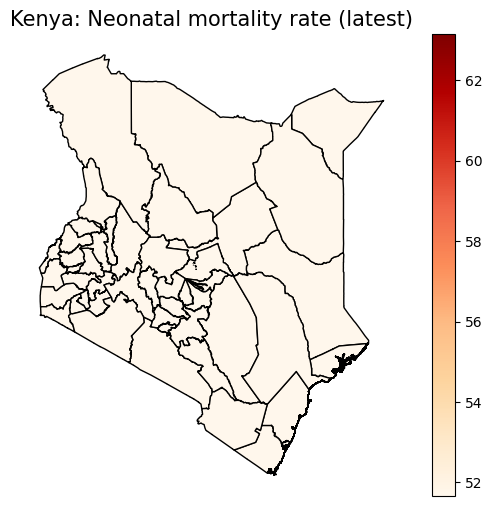

In [ ]:

# Select an indicator to visualize
to_plot = 'Neonatal mortality rate'

# Get value
indicator_value = latest_kenya[latest_kenya['Indicator'] == to_plot]['Observation Value'].values[0]

# Add this value to the GeoDataFrame
kenya_shapefile['Indicator Value'] = indicator_value

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
kenya_shapefile.plot(column='Indicator Value', cmap='OrRd', legend=True, edgecolor='black', ax=ax)

plt.title(f'Kenya: {to_plot} (latest)', fontsize=15)
plt.axis('off')
plt.show()


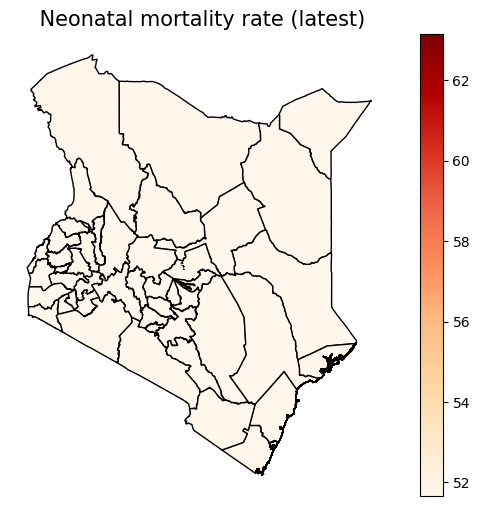

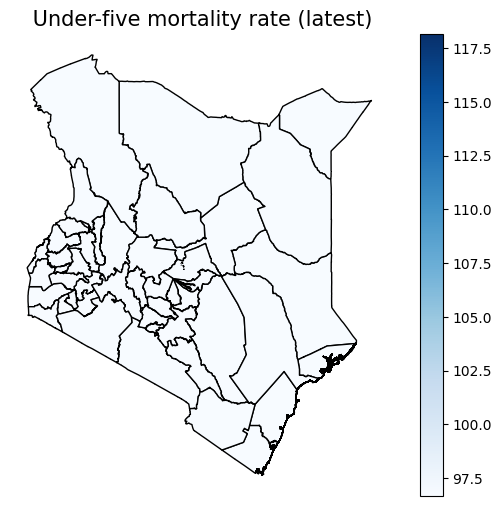

In [ ]:
# Function to plot a specific indicator
def plot_indicator(kenya_shapefile, latest_kenya, indicator_name, cmap='OrRd'):
    # Get the indicator value
    indicator_value = latest_kenya[latest_kenya['Indicator'] == indicator_name]['Observation Value'].values[0]

    kenya_shapefile['Indicator Value'] = indicator_value

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    kenya_shapefile.plot(column='Indicator Value', cmap=cmap, legend=True, edgecolor='black', ax=ax)

    plt.title(f' {indicator_name} (latest)', fontsize=15)
    plt.axis('off')
    plt.show()

# Plot Neonatal mortality rate
plot_indicator(kenya_shapefile, latest_kenya, 'Neonatal mortality rate', cmap='OrRd')

# Plot Under-five mortality rate
plot_indicator(kenya_shapefile, latest_kenya, 'Under-five mortality rate', cmap='Blues')


### Burundi

In [ ]:
#extract the zipfile
path = 'gadm41_BDI_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_BDI_shp')


In [ ]:
print(os.listdir('gadm41_BDI_shp'))

['gadm41_BDI_3.shp', 'gadm41_BDI_1.shp', 'gadm41_BDI_4.dbf', 'gadm41_BDI_2.dbf', 'gadm41_BDI_4.prj', 'gadm41_BDI_1.dbf', 'gadm41_BDI_0.prj', 'gadm41_BDI_0.shx', 'gadm41_BDI_0.shp', 'gadm41_BDI_4.shx', 'gadm41_BDI_1.cpg', 'gadm41_BDI_2.cpg', 'gadm41_BDI_3.dbf', 'gadm41_BDI_0.cpg', 'gadm41_BDI_0.dbf', 'gadm41_BDI_3.prj', 'gadm41_BDI_2.prj', 'gadm41_BDI_4.shp', 'gadm41_BDI_1.prj', 'gadm41_BDI_3.shx', 'gadm41_BDI_2.shx', 'gadm41_BDI_1.shx', 'gadm41_BDI_2.shp', 'gadm41_BDI_3.cpg', 'gadm41_BDI_4.cpg']


In [ ]:
#load the shapefile
burundi_shapefile = gpd.read_file('gadm41_BDI_shp/gadm41_BDI_1.shp')
burundi_shapefile.head()

GID_1 GID_0  COUNTRY            NAME_1 VARNAME_1 NL_NAME_1    TYPE_1  \
0  BDI.1_1   BDI  Burundi           Bubanza        NA        NA  Province   
1  BDI.2_1   BDI  Burundi  Bujumbura Mairie        NA        NA  Province   
2  BDI.3_1   BDI  Burundi   Bujumbura Rural  Usumbura        NA  Province   
3  BDI.4_1   BDI  Burundi            Bururi        NA        NA  Province   
4  BDI.5_1   BDI  Burundi           Cankuzo        NA        NA  Province   

  ENGTYPE_1       CC_1 HASC_1  ISO_1  \
0  Province  003BDI001  BI.BB     NA   
1  Province  003BDI017  BI.BM  BI-BM   
2  Province  003BDI002  BI.BU     NA   
3  Province  003BDI003  BI.BR  BI-BR   
4  Province  003BDI004  BI.CA     NA   

                                            geometry  
0  POLYGON ((29.30426 -3.28991, 29.29973 -3.28909...  
1  POLYGON ((29.36977 -3.44545, 29.37182 -3.44864...  
2  POLYGON ((29.30273 -3.72888, 29.28177 -3.72422...  
3  POLYGON ((29.63503 -4.12952, 29.63491 -4.12999...  
4  POLYGON ((30.58173 -3.39356, 30.58069 -3.39439...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for BURUNDI
burundi_df4 = df4[df4['Geographic area'] == 'Burundi']

#latest estimate for indicator
latest_burundi = burundi_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_burundi[['Indicator','Observation Value', 'Series Year']])


                      Indicator  Observation Value  Series Year
6940  Under-five mortality rate         172.057506       2023.0
6412    Neonatal mortality rate          49.069083       2023.0


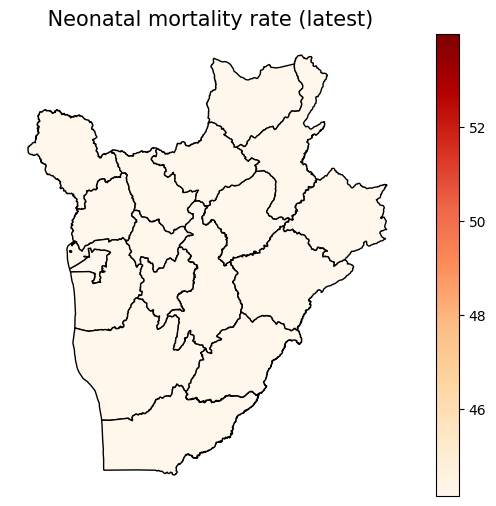

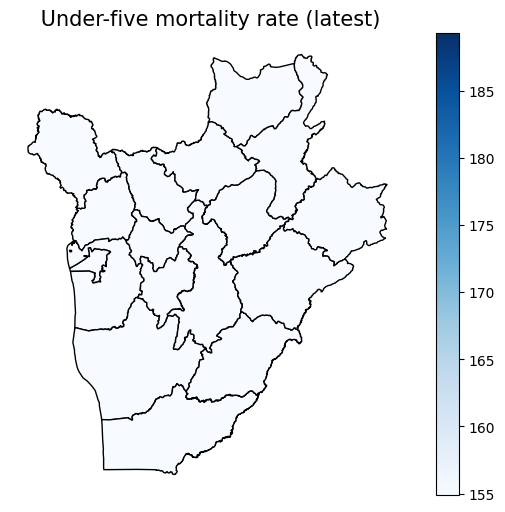

In [ ]:
# Plot Neonatal mortality rate
plot_indicator(burundi_shapefile, latest_burundi, 'Neonatal mortality rate', cmap='OrRd')

# Plot Under-five mortality rate
plot_indicator(burundi_shapefile, latest_burundi, 'Under-five mortality rate', cmap='Blues')

### Uganda

In [ ]:
#extract the zipfile
path = 'gadm41_UGA_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_UGA_shp')

In [ ]:
#load the shapefile
uganda_shapefile = gpd.read_file('gadm41_UGA_shp/gadm41_UGA_1.shp')
uganda_shapefile.head()

GID_1 GID_0 COUNTRY      NAME_1 VARNAME_1 NL_NAME_1    TYPE_1 ENGTYPE_1  \
0  UGA.1_1   UGA  Uganda    Adjumani        NA        NA  District  District   
1  UGA.2_1   UGA  Uganda        Apac        NA        NA  District  District   
2  UGA.3_1   UGA  Uganda        Arua        NA        NA  District  District   
3  UGA.4_1   UGA  Uganda      Bugiri        NA        NA  District  District   
4  UGA.5_1   UGA  Uganda  Bundibugyo        NA        NA  District  District   

  CC_1 HASC_1   ISO_1                                           geometry  
0   30  UG.AD  UG-301  POLYGON ((31.78725 3.52509, 31.7881 3.52574, 3...  
1   30  UG.AC  UG-302  POLYGON ((32.2501 1.67006, 32.24971 1.67009, 3...  
2   30  UG.AW  UG-303  POLYGON ((30.85623 2.67567, 30.85623 2.67562, ...  
3   20  UG.BG  UG-201  MULTIPOLYGON (((33.94586 -0.21923, 33.94044 -0...  
4   40  UG.BN  UG-401  MULTIPOLYGON (((29.95548 0.40496, 29.95341 0.4...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for uganda
uganda_df4 = df4[df4['Geographic area'] == 'Uganda']

#latest estimate for indicator
latest_uganda = uganda_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_uganda[['Indicator','Observation Value', 'Series Year']])


                        Indicator  Observation Value  Series Year
113608  Under-five mortality rate         174.265564       2023.0
112741    Neonatal mortality rate          59.771253       2023.0


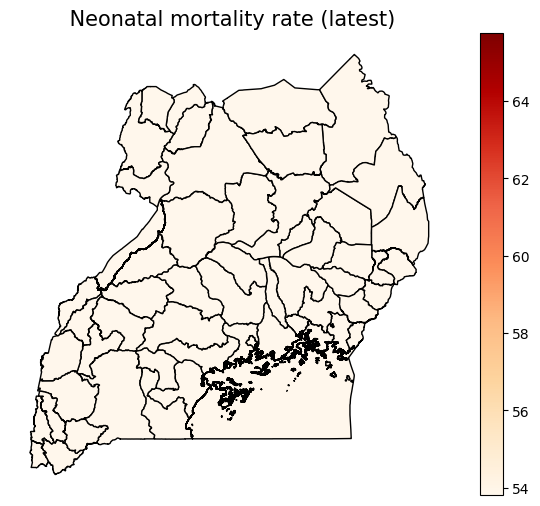

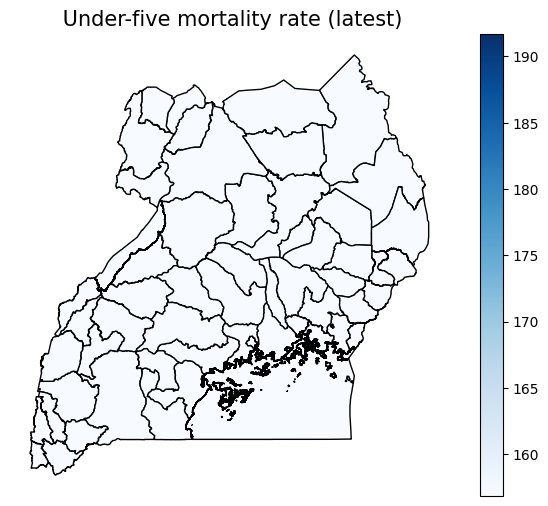

In [ ]:
# Plot Neonatal mortality rate
plot_indicator(uganda_shapefile, latest_uganda, 'Neonatal mortality rate', cmap='OrRd')

# Plot Under-five mortality rate
plot_indicator(uganda_shapefile, latest_uganda, 'Under-five mortality rate', cmap='Blues')

### Tanzania

In [ ]:
#extract the zipfile
path = 'gadm41_TZA_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_TZA_shp')

In [ ]:
#load the shapefile
tz_shapefile = gpd.read_file('gadm41_TZA_shp/gadm41_TZA_1.shp')
tz_shapefile.head()

GID_1 GID_0   COUNTRY         NAME_1            VARNAME_1 NL_NAME_1  \
0  TZA.1_1   TZA  Tanzania         Arusha                   NA        NA   
1  TZA.2_1   TZA  Tanzania  Dar es Salaam  Dar-es-salaam|Pwani        NA   
2  TZA.3_1   TZA  Tanzania         Dodoma                   NA        NA   
3  TZA.4_1   TZA  Tanzania          Geita                   NA        NA   
4  TZA.5_1   TZA  Tanzania         Iringa                   NA        NA   

  TYPE_1 ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0   Mkoa    Region   02  TZ.AS  TZ-01   
1   Mkoa    Region   07  TZ.DS  TZ-02   
2   Mkoa    Region   01  TZ.DO  TZ-03   
3   Mkoa    Region   25  TZ.GE  TZ-27   
4   Mkoa    Region   11  TZ.IG  TZ-04   

                                            geometry  
0  POLYGON ((36.61997 -3.66314, 36.61924 -3.66546...  
1  MULTIPOLYGON (((39.49847 -7.18875, 39.49903 -7...  
2  POLYGON ((36.51123 -7.23977, 36.51193 -7.23946...  
3  POLYGON ((31.99989 -3.74618, 31.99752 -3.74578...  
4  POLYGON ((35.57241 -8.68685, 35.57011 -8.68733...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for uganda
tz_df4 = df4[df4['Geographic area'] == 'Tanzania']

#latest estimate for indicator
latest_tz = tz_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_tz[['Indicator','Observation Value', 'Series Year']])

Empty DataFrame
Columns: [Indicator, Observation Value, Series Year]
Index: []


### South Sudan

In [ ]:
#extract the zipfile
path = 'gadm41_SSD_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_SSD_shp')

In [ ]:
#load the shapefile
sd_shapefile = gpd.read_file('gadm41_SSD_shp/gadm41_SSD_1.shp')
sd_shapefile.head()

GID_1 GID_0      COUNTRY                NAME_1  \
0  SSD.1_1   SSD  South Sudan     Central Equatoria   
1  SSD.2_1   SSD  South Sudan     Eastern Equatoria   
2  SSD.3_1   SSD  South Sudan               Jungoli   
3  SSD.4_1   SSD  South Sudan                 Lakes   
4  SSD.5_1   SSD  South Sudan  North Bahr-al-Ghazal   

                          VARNAME_1 NL_NAME_1   TYPE_1 ENGTYPE_1 CC_1 HASC_1  \
0      Bahr el Gabel| Bahr-al-Jabal        NA  Wilayat     State   NA  SD.BG   
1  Al Istiwā'īyah ash Sharqīyah| Sh        NA  Wilayat     State   NA  SD.EE   
2  Jonglei| Jonglie| Jonqley| Jungl        NA  Wilayat     State   NA  SD.JG   
3                                NA        NA  Wilayat     State   NA  SD.EB   
4   North Bahr-al-Gazal| North Bahr        NA  Wilayat     State   NA  SD.NB   

   ISO_1                                           geometry  
0  SS-EC  POLYGON ((31.7958 3.82234, 31.79587 3.82161, 3...  
1  SS-EE  POLYGON ((31.80113 3.835, 31.78612 3.86557, 31...  
2     NA  POLYGON ((34.61291 6.73273, 34.62901 6.74911, ...  
3     NA  POLYGON ((31.69021 5.83383, 31.6842 5.81828, 3...  
4     NA  POLYGON ((27.58898 8.86364, 27.59064 8.85246, ...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for uganda
sd_df4 = df4[df4['Geographic area'] == 'South Sudan']

#latest estimate for indicator
latest_sd = sd_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_sd[['Indicator','Observation Value', 'Series Year']])

                       Indicator  Observation Value  Series Year
99677  Under-five mortality rate          98.728442       2023.0
99178    Neonatal mortality rate          65.834200       2023.0


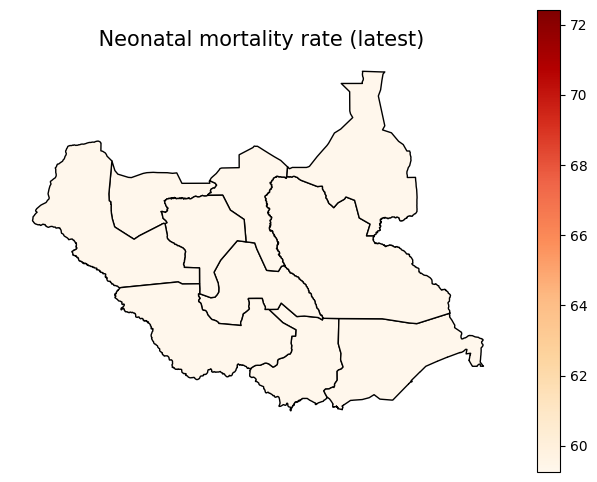

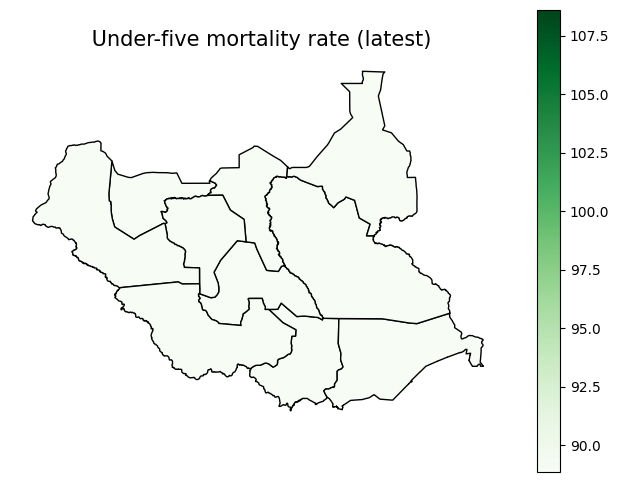

In [ ]:
# Plot Neonatal mortality rate
plot_indicator(sd_shapefile, latest_sd, 'Neonatal mortality rate', cmap='OrRd')

# Plot Under-five mortality rate
plot_indicator(sd_shapefile, latest_sd, 'Under-five mortality rate', cmap='Greens')

### Somalia

In [ ]:
#extract the zipfile
path = 'gadm41_SOM_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_SOM_shp')

In [ ]:
#load the shapefile
som_shapefile = gpd.read_file('gadm41_SOM_shp/gadm41_SOM_1.shp')
som_shapefile.head()

GID_1 GID_0  COUNTRY    NAME_1    VARNAME_1 NL_NAME_1   TYPE_1 ENGTYPE_1  \
0  SOM.1_1   SOM  Somalia     Awdal  Adal | Adel        NA  Gobolka    Region   
1  SOM.2_1   SOM  Somalia    Bakool           NA        NA  Gobolka    Region   
2  SOM.3_1   SOM  Somalia  Banaadir      Benadir        NA  Gobolka    Region   
3  SOM.4_1   SOM  Somalia      Bari           NA        NA  Gobolka    Region   
4  SOM.5_1   SOM  Somalia       Bay         Baay        NA  Gobolka    Region   

  CC_1 HASC_1  ISO_1                                           geometry  
0   NA  SO.AW  SO-AW  MULTIPOLYGON (((43.28722 9.69274, 43.28283 9.6...  
1   NA  SO.BK     NA  POLYGON ((43.68 3.72, 43.58 3.61, 43.41 3.57, ...  
2   NA  SO.BN  SO-BN  POLYGON ((45.60347 2.18304, 45.60347 2.18292, ...  
3   NA  SO.BR  SO-BR  MULTIPOLYGON (((49.93 8.46, 49.89 8.4, 49.84 8...  
4   NA  SO.BY     NA  POLYGON ((44.41 3.26, 44.61 3.27, 44.66 3.25, ...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for uganda
som_df4 = df4[df4['Geographic area'] == 'Somalia']

#latest estimate for indicator
latest_som = som_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_som[['Indicator','Observation Value', 'Series Year']])

                       Indicator  Observation Value  Series Year
98554  Under-five mortality rate         104.019175       2023.0
98180    Neonatal mortality rate          48.492471       2023.0


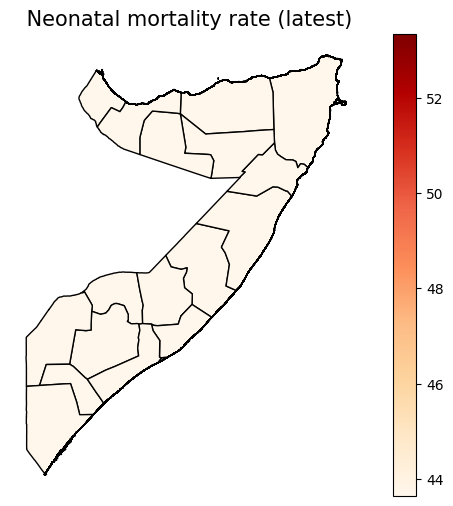

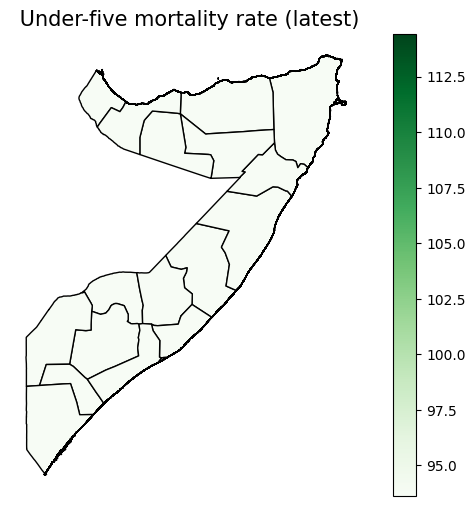

In [ ]:
# Plot Neonatal mortality rate
plot_indicator(som_shapefile, latest_som, 'Neonatal mortality rate', cmap='OrRd')

# Plot Under-five mortality rate
plot_indicator(som_shapefile, latest_som, 'Under-five mortality rate', cmap='Greens')

### Rwanda

In [ ]:
#extract the zipfile
path = 'gadm41_RWA_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_RWA_shp')

In [ ]:
#load the shapefile
rwa_shapefile = gpd.read_file('gadm41_RWA_shp/gadm41_RWA_1.shp')
rwa_shapefile.head()

GID_1 GID_0 COUNTRY            NAME_1                         VARNAME_1  \
0  RWA.1_1   RWA  Rwanda      Amajyaruguru  Northern Province|Province du No   
1  RWA.2_1   RWA  Rwanda         Amajyepfo  Southern Province|Province du Su   
2  RWA.3_1   RWA  Rwanda     Iburasirazuba  Eastern Province|Province de l'E   
3  RWA.4_1   RWA  Rwanda    Iburengerazuba  Western Province|Province de l'O   
4  RWA.5_1   RWA  Rwanda  Umujyi wa Kigali       Kigali City|Ville de Kigali   

  NL_NAME_1    TYPE_1 ENGTYPE_1 CC_1 HASC_1 ISO_1  \
0        NA  Province  Province    4  RW.NO    NA   
1        NA  Province  Province    2  RW.SU    NA   
2        NA  Province  Province    5  RW.ES    NA   
3        NA  Province  Province    3  RW.OU    NA   
4        NA  Province  Province    1  RW.KV    NA   

                                            geometry  
0  POLYGON ((29.99236 -1.9076, 29.99233 -1.90762,...  
1  POLYGON ((29.54066 -2.8291, 29.54037 -2.82908,...  
2  POLYGON ((30.66794 -2.40388, 30.66714 -2.40428...  
3  POLYGON ((29.0355 -2.73745, 29.03542 -2.73676,...  
4  POLYGON ((30.01605 -2.07548, 30.01598 -2.07502...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for uganda
rwa_df4 = df4[df4['Geographic area'] == 'Rwanda']

#latest estimate for indicator
latest_rwa = rwa_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_rwa[['Indicator','Observation Value', 'Series Year']])

                       Indicator  Observation Value  Series Year
93332  Under-five mortality rate         175.341948       2023.0
92429    Neonatal mortality rate          62.801270       2023.0


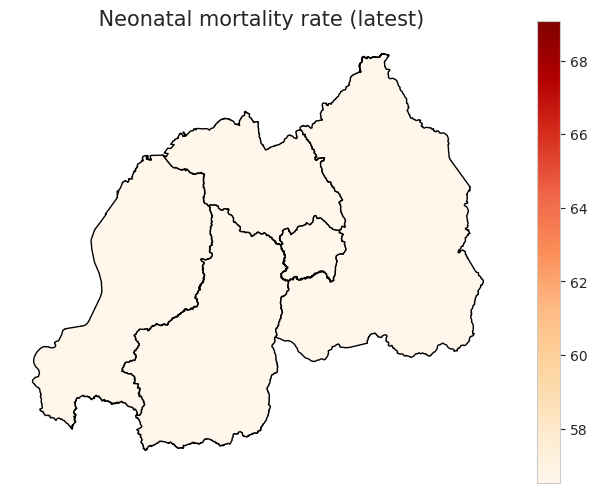

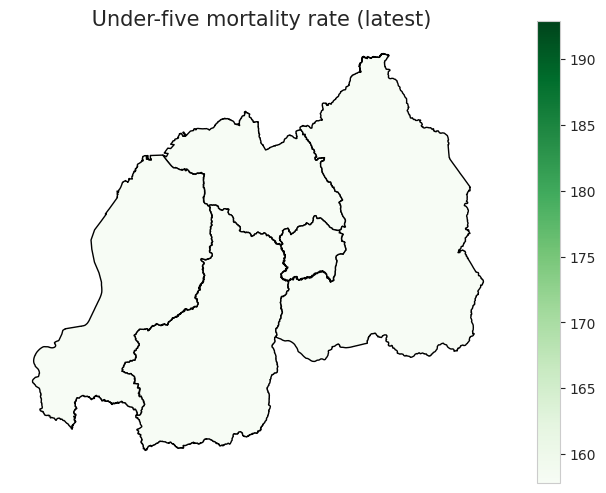

In [ ]:
# Plot Neonatal mortality rate
plot_indicator(rwa_shapefile, latest_rwa, 'Neonatal mortality rate', cmap='OrRd')

# Plot Under-five mortality rate
plot_indicator(rwa_shapefile, latest_rwa, 'Under-five mortality rate', cmap='Greens')

### Democratic Republic of the Congo

In [ ]:
#extract the zipfile
path = 'gadm41_COD_shp.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_COD_shp')

In [ ]:
#load the shapefile
drc_shapefile = gpd.read_file('gadm41_COD_shp/gadm41_COD_1.shp')
drc_shapefile.head()

GID_1 GID_0                           COUNTRY        NAME_1 VARNAME_1  \
0  COD.1_1   COD  Democratic Republic of the Congo      Bas-Uele        NA   
1  COD.2_1   COD  Democratic Republic of the Congo      Équateur        NA   
2  COD.3_1   COD  Democratic Republic of the Congo  Haut-Katanga        NA   
3  COD.4_1   COD  Democratic Republic of the Congo   Haut-Lomami        NA   
4  COD.5_1   COD  Democratic Republic of the Congo     Haut-Uele        NA   

  NL_NAME_1    TYPE_1 ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0        NA  Province  Province   NA  CD.BU     NA   
1        NA  Province  Province   NA  CD.ET     NA   
2        NA  Province  Province   NA  CD.HK  CD-HK   
3        NA  Province  Province   NA  CD.HL     NA   
4        NA  Province  Province   NA  CD.HU     NA   

                                            geometry  
0  POLYGON ((23.54289 2.44556, 23.53645 2.45128, ...  
1  POLYGON ((17.11355 -1.78642, 17.10765 -1.78636...  
2  POLYGON ((28.52324 -11.88198, 28.53324 -11.888...  
3  POLYGON ((25.49803 -9.49573, 25.4987 -9.49684,...  
4  POLYGON ((28.3139 2.33613, 28.31679 2.31445, 2...

In [ ]:
#extract latest year for indicator as numeric
df4['Series Year'] = df4['Series Year'].astype(str).str.extract('(\d{4})').astype(float)

#filter for uganda
drc_df4 = df4[df4['Geographic area'] == 'Democratic Republic of the Congo']

#latest estimate for indicator
latest_drc = drc_df4.sort_values('Series Year').groupby('Indicator').tail(1)

print(latest_drc[['Indicator','Observation Value', 'Series Year']])

                       Indicator  Observation Value  Series Year
22238  Under-five mortality rate         180.987543       2023.0
21790    Neonatal mortality rate          39.342209       2023.0


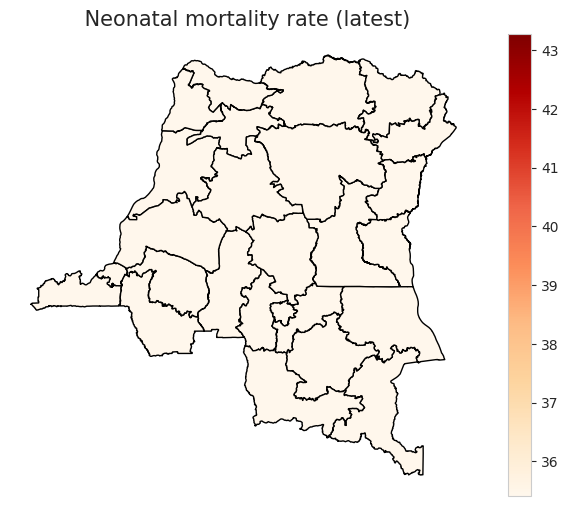

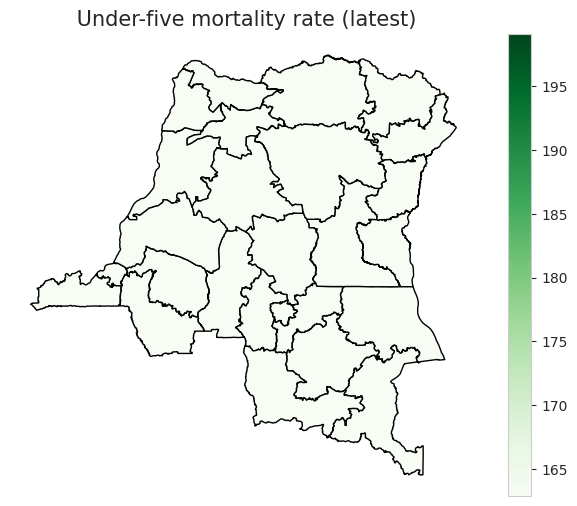

In [ ]:
# Plot Neonatal mortality rate
plot_indicator(drc_shapefile, latest_drc, 'Neonatal mortality rate', cmap='OrRd')

# Plot Under-five mortality rate
plot_indicator(drc_shapefile, latest_drc, 'Under-five mortality rate', cmap='Greens')

## -	Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator. Expectation: two plots).

### Kenya

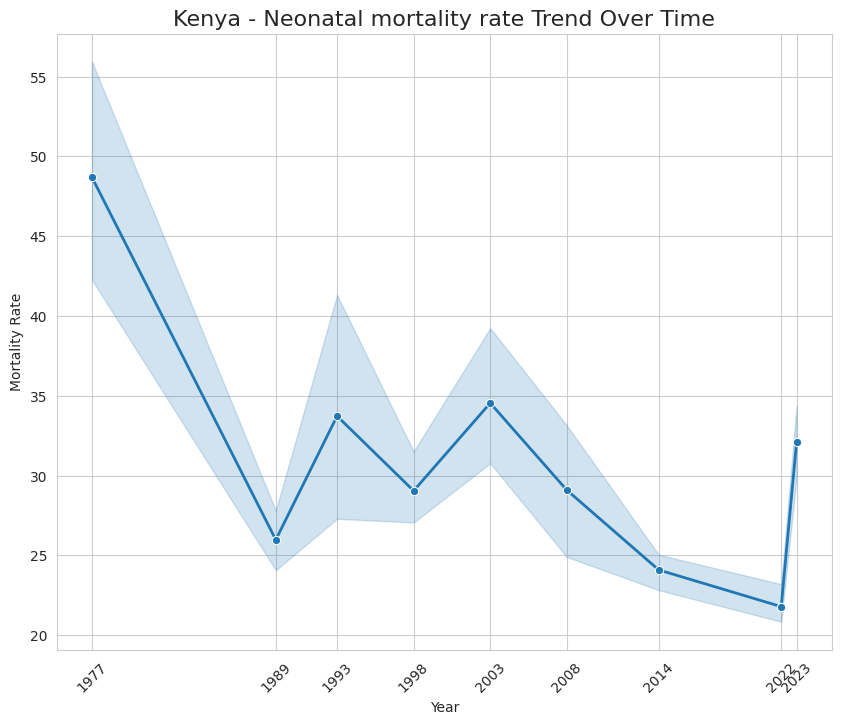

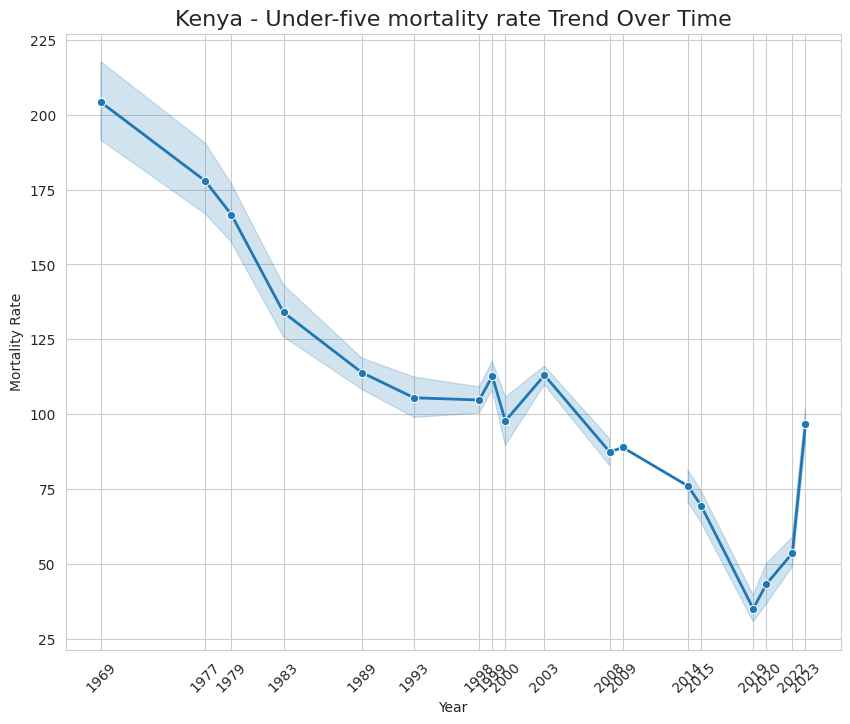

In [ ]:
sns.set_style('whitegrid')

# Define the indicators
indicators = ['Neonatal mortality rate', 'Under-five mortality rate']

# Plot for each indicator separately
for indicator in indicators:
    # Filter the data for the indicator
    subset = kenya_df4[kenya_df4['Indicator'] == indicator]

    # Sort by year
    subset = subset.sort_values('Series Year')

    # Plot
    plt.figure(figsize=(10,8))
    sns.lineplot(x='Series Year', y='Observation Value', data=subset, marker='o', linewidth=2)
    plt.title(f'Kenya - {indicator} Trend Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.xticks(subset['Series Year'].unique(), rotation=45)
    plt.grid(True)
    plt.show()


### Burundi

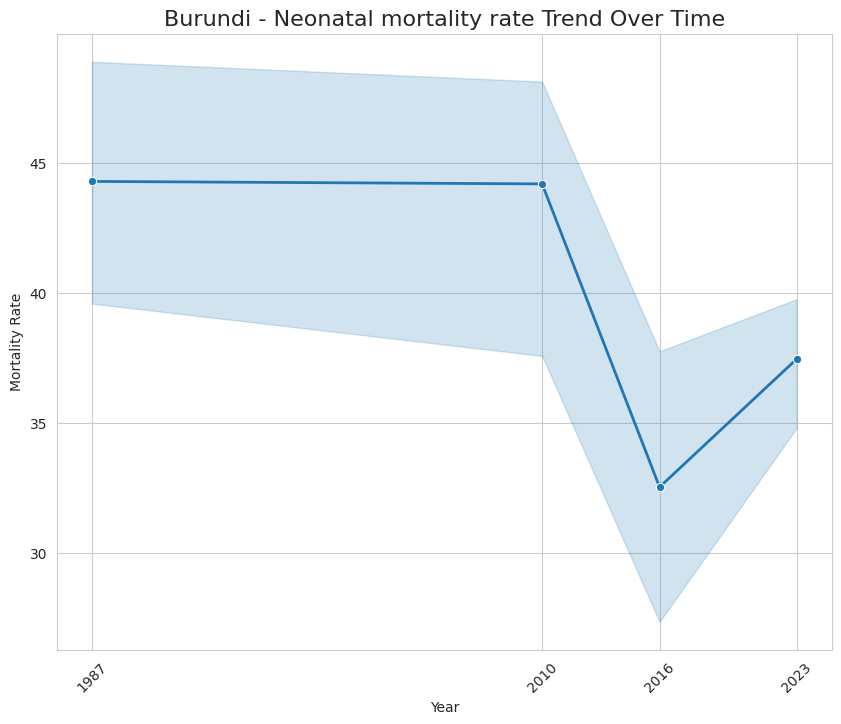

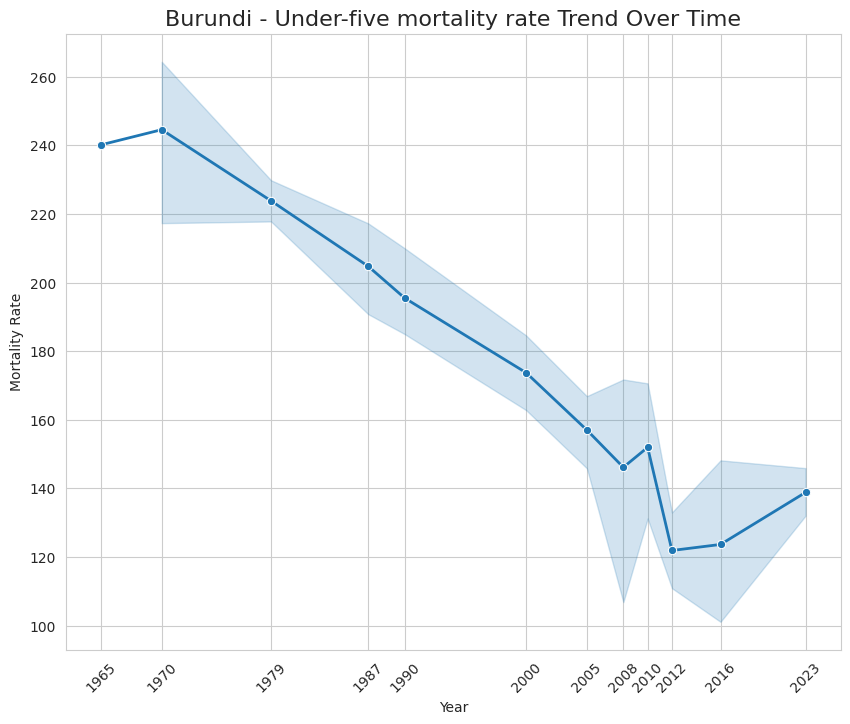

In [ ]:
sns.set_style('whitegrid')

# Define the indicators
indicators = ['Neonatal mortality rate', 'Under-five mortality rate']

# Plot for each indicator separately
for indicator in indicators:
    # Filter the data for the indicator
    subset = burundi_df4[burundi_df4['Indicator'] == indicator]

    # Sort by year
    subset = subset.sort_values('Series Year')

    # Plot
    plt.figure(figsize=(10,8))
    sns.lineplot(x='Series Year', y='Observation Value', data=subset, marker='o', linewidth=2)
    plt.title(f'Burundi - {indicator} Trend Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.xticks(subset['Series Year'].unique(), rotation=45)
    plt.grid(True)
    plt.show()


### Uganda

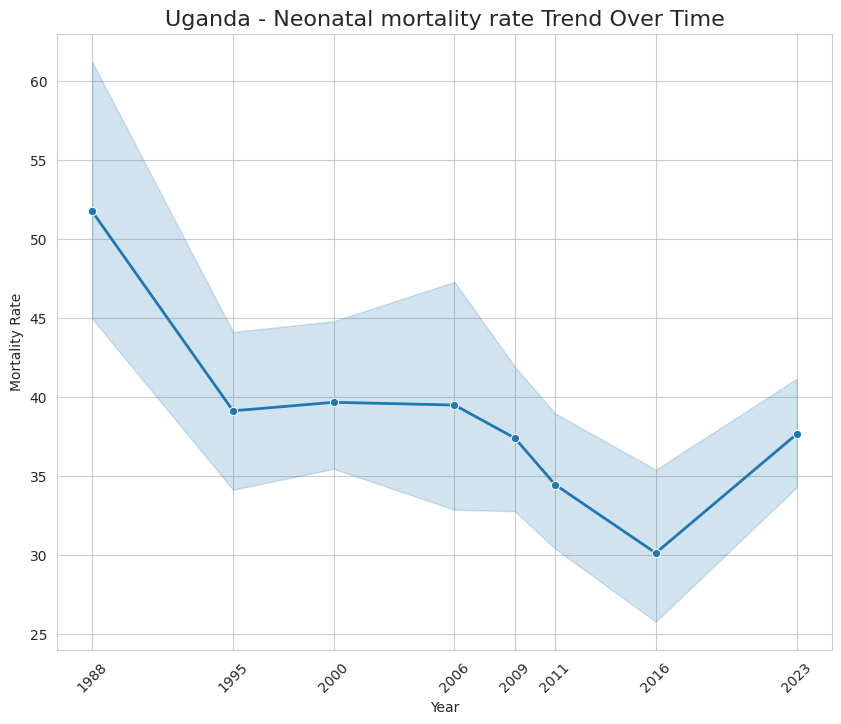

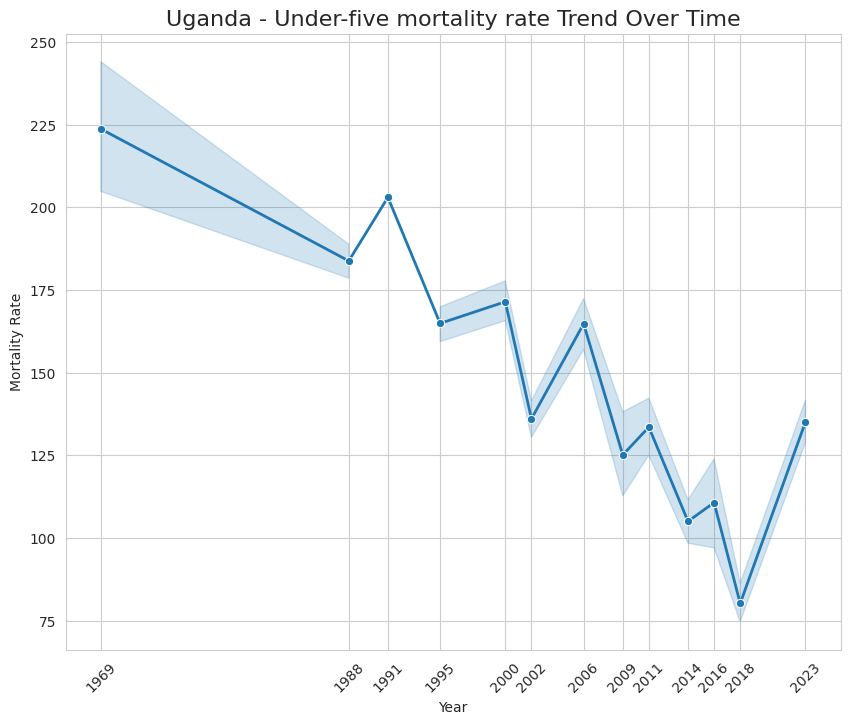

In [ ]:
sns.set_style('whitegrid')

# Define the indicators
indicators = ['Neonatal mortality rate', 'Under-five mortality rate']

# Plot for each indicator separately
for indicator in indicators:
    # Filter the data for the indicator
    subset = uganda_df4[uganda_df4['Indicator'] == indicator]

    # Sort by year
    subset = subset.sort_values('Series Year')

    # Plot
    plt.figure(figsize=(10,8))
    sns.lineplot(x='Series Year', y='Observation Value', data=subset, marker='o', linewidth=2)
    plt.title(f'Uganda - {indicator} Trend Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.xticks(subset['Series Year'].unique(), rotation=45)
    plt.grid(True)
    plt.show()


### South Sudan

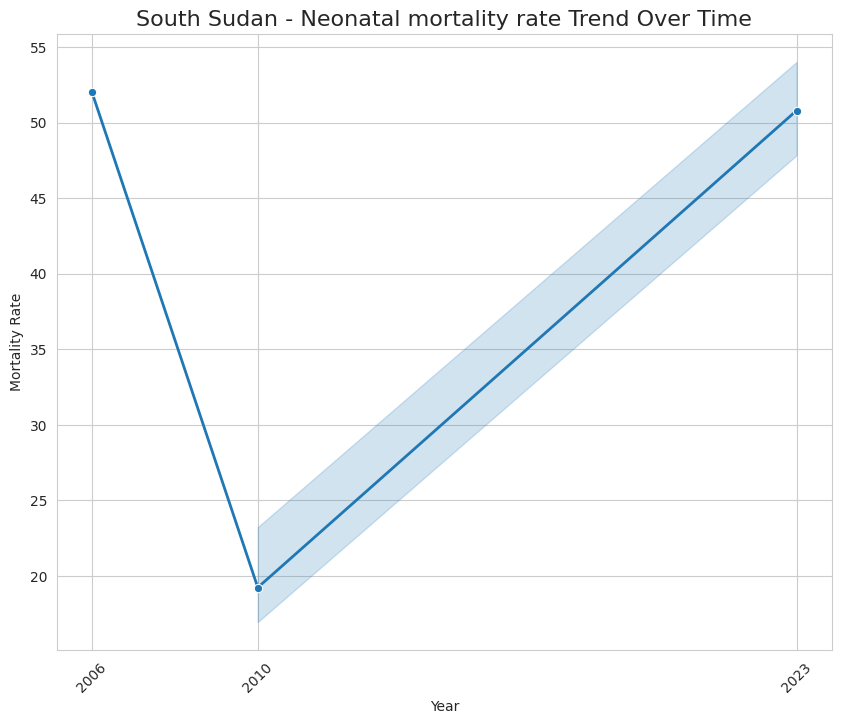

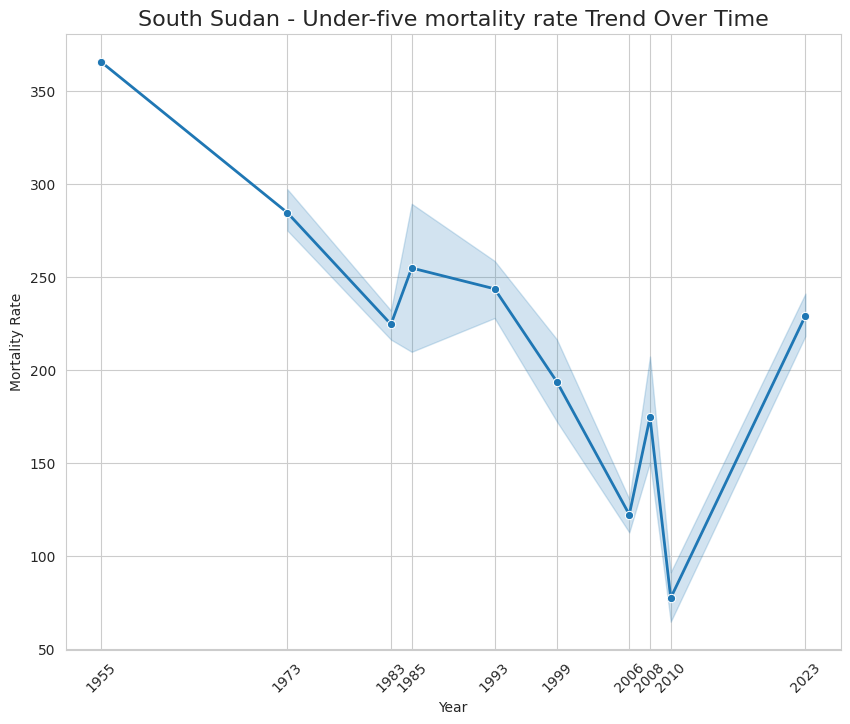

In [ ]:
sns.set_style('whitegrid')

# Define the indicators
indicators = ['Neonatal mortality rate', 'Under-five mortality rate']

# Plot for each indicator separately
for indicator in indicators:
    # Filter the data for the indicator
    subset = sd_df4[sd_df4['Indicator'] == indicator]

    # Sort by year
    subset = subset.sort_values('Series Year')

    # Plot
    plt.figure(figsize=(10,8))
    sns.lineplot(x='Series Year', y='Observation Value', data=subset, marker='o', linewidth=2)
    plt.title(f'South Sudan - {indicator} Trend Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.xticks(subset['Series Year'].unique(), rotation=45)
    plt.grid(True)
    plt.show()


### Somalia

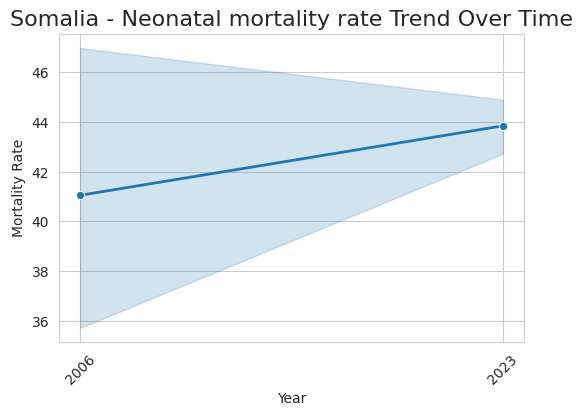

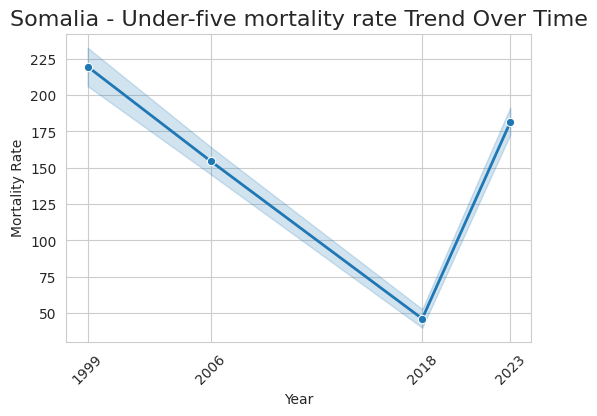

In [ ]:
sns.set_style('whitegrid')

# Define the indicators
indicators = ['Neonatal mortality rate', 'Under-five mortality rate']

# Plot for each indicator separately
for indicator in indicators:
    # Filter the data for the indicator
    subset = som_df4[som_df4['Indicator'] == indicator]

    # Sort by year
    subset = subset.sort_values('Series Year')

    # Plot
    plt.figure(figsize=(6,4))
    sns.lineplot(x='Series Year', y='Observation Value', data=subset, marker='o', linewidth=2)
    plt.title(f'Somalia - {indicator} Trend Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.xticks(subset['Series Year'].unique(), rotation=45)
    plt.grid(True)
    plt.show()


### Rwanda

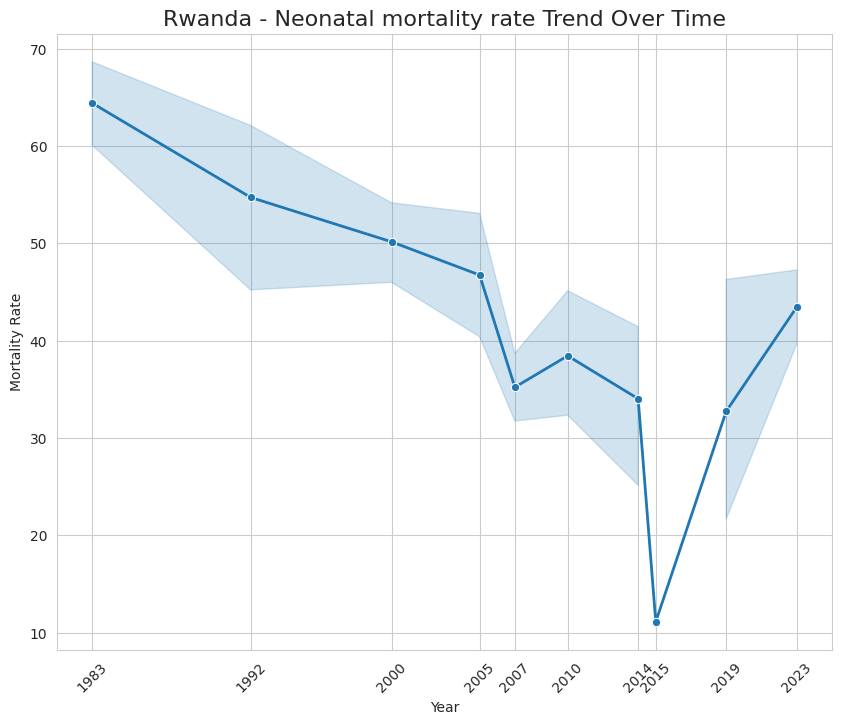

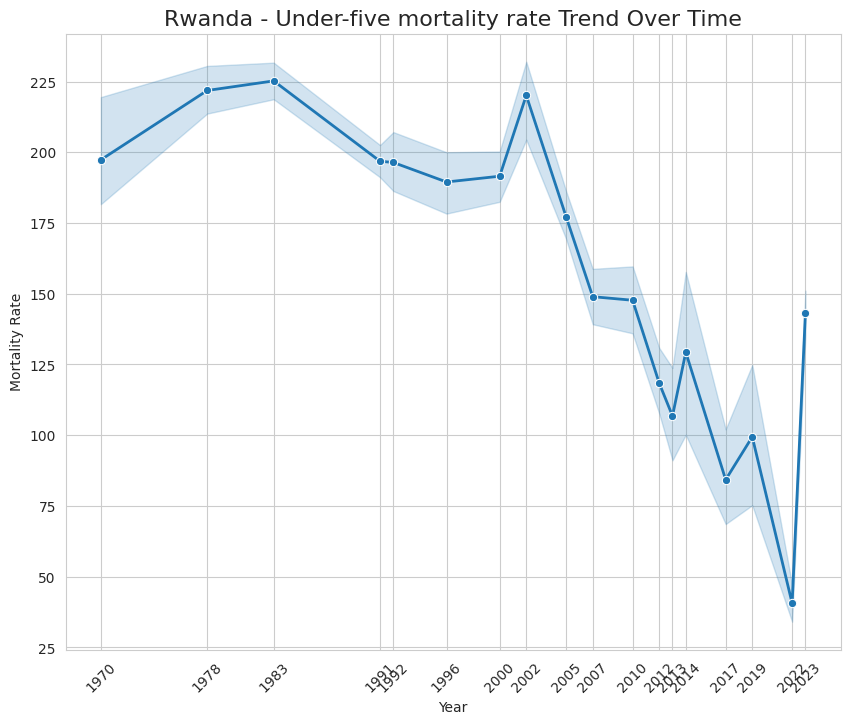

In [ ]:
sns.set_style('whitegrid')

# Define the indicators
indicators = ['Neonatal mortality rate', 'Under-five mortality rate']

# Plot for each indicator separately
for indicator in indicators:
    # Filter the data for the indicator
    subset = rwa_df4[rwa_df4['Indicator'] == indicator]

    # Sort by year
    subset = subset.sort_values('Series Year')

    # Plot
    plt.figure(figsize=(10,8))
    sns.lineplot(x='Series Year', y='Observation Value', data=subset, marker='o', linewidth=2)
    plt.title(f'Rwanda - {indicator} Trend Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.xticks(subset['Series Year'].unique(), rotation=45)
    plt.grid(True)
    plt.show()


### Democratic Republic of the Congo

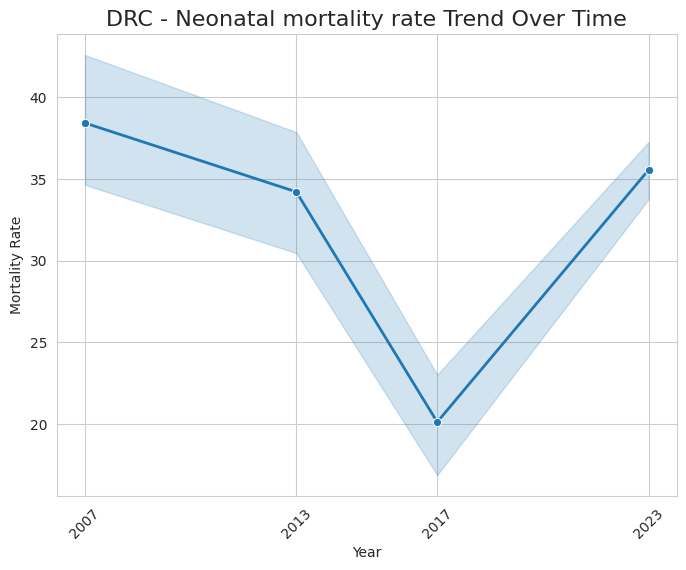

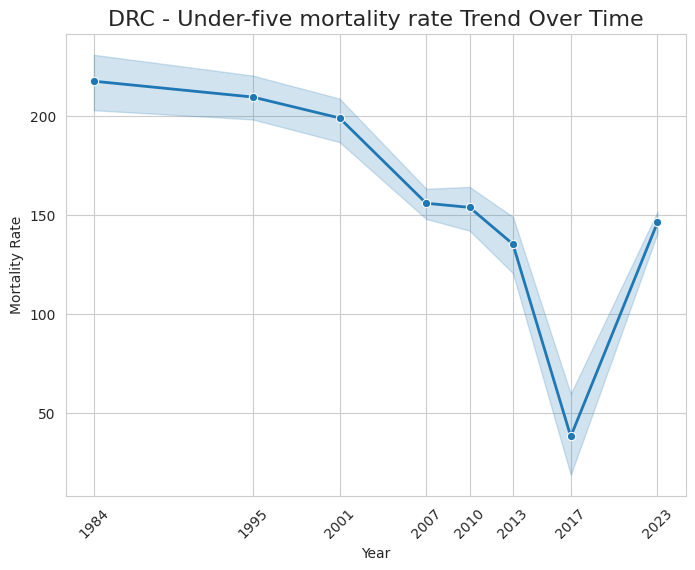

In [ ]:
sns.set_style('whitegrid')

# Define the indicators
indicators = ['Neonatal mortality rate', 'Under-five mortality rate']

# Plot for each indicator separately
for indicator in indicators:
    # Filter the data for the indicator
    subset = drc_df4[drc_df4['Indicator'] == indicator]

    # Sort by year
    subset = subset.sort_values('Series Year')

    # Plot
    plt.figure(figsize=(8,6))
    sns.lineplot(x='Series Year', y='Observation Value', data=subset, marker='o', linewidth=2)
    plt.title(f'DRC - {indicator} Trend Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.xticks(subset['Series Year'].unique(), rotation=45)
    plt.grid(True)
    plt.show()


## -	Based on your visualizations, identify the countries with the highest under-five mortality rates in East Africa and the highest neonatal mortality.

- The country with the highest under-five mortality rate is:
 1. South Sudan has the highest with a mortality rate of over 350 compared to the other countries in East Africa over the years .

- The country with the highest neonatal mortality rate is:
 1. South Sudan with over 50 from 1999 and is still over 50 in 2023 compared to the other countries in East Africa.
